## Final Project Submission

Please fill out:
* Student name: Isabella Lindgren
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Pablo Crespo
* Blog post URL:


In [1253]:
# Import all necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression

In [1254]:
# read in the data using pandas
kc = pd.read_csv("kc_house_data.csv")

# Get a brief overview of the data

print(kc.head(5))
# We can already see that there are some missing values
print("---------------------------------------------------------------------------------")

print(kc.describe())
# We can see that there is some categorical data, some columns are very '0' heavy
print("---------------------------------------------------------------------------------")



           id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  

In [1255]:
print(kc.info()) #check for missing data and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB
None


Observations:

- Date and Sqft_basement are objects
- waterfront, view, yr_renovated missing data
- There are some outliers (a house has 33 bedrooms)
- Target variable: price

What are these variables actually explaining?

- id - Unique ID for each home sold 
- date - Date of the home sale 
- price - Price of each home sold 
- bedrooms - Number of bedrooms 
- bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower 
- sqft_living - Square footage of the apartments interior living space 
- sqft_lot - Square footage of the land space 
- floors - Number of floors 
- waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not 
- view - An index from 0 to 4 of how good the view of the property was 
- condition - An index from 1 to 5 on the condition of the apartment, 
- grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 
  7 has an average level of construction and design, and 11-13 have a high quality level of 
  construction and design. 
- sqft_above - The square footage of the interior housing space that is above ground level 
- sqft_basement - The square footage of the interior housing space that is below ground level 
- yr_built - The year the house was initially built 
- yr_renovated - The year of the house’s last renovation 
- zipcode - What zipcode area the house is in 
- lat - Latitude 
- long - Longitude 
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors 
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors 

## What is my objective for this project?

- To create an accurate model to help predict housing prices in King County, Washington
- Stakeholders: Homeowners

## Let's start cleaning our data! 

In [1256]:
# check for duplicated rows using 'id' and see if there is any repetition
duplicates = kc[kc.duplicated(subset='id')]
print(len(duplicates))   # there are 177 repeating 'id' values

177


In [1257]:
# drop duplicates from the dataset
kc.drop_duplicates(subset='id', keep='first', inplace=True)

In [1258]:
kc.info() 
# Now we can see instead of 21597 values, we have 21420 values for most columns except for the ones missing data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
id               21420 non-null int64
date             21420 non-null object
price            21420 non-null float64
bedrooms         21420 non-null int64
bathrooms        21420 non-null float64
sqft_living      21420 non-null int64
sqft_lot         21420 non-null int64
floors           21420 non-null float64
waterfront       19067 non-null float64
view             21357 non-null float64
condition        21420 non-null int64
grade            21420 non-null int64
sqft_above       21420 non-null int64
sqft_basement    21420 non-null object
yr_built         21420 non-null int64
yr_renovated     17616 non-null float64
zipcode          21420 non-null int64
lat              21420 non-null float64
long             21420 non-null float64
sqft_living15    21420 non-null int64
sqft_lot15       21420 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.6+ MB


In [1259]:
# check for any missing data using boolean, confirms we are missing values in waterfront, view, and yr_renovated
kc.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [1260]:
kc.isna().sum() # how many values are missing in each column

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2353
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3804
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

We can see that 'waterfront' and 'yr_renovated' are missing a large amount of data inputs. The variable "view" is only missing 63 values so let's tackle that one first.

mean      0.234677
median    0.000000
std       0.766459
Name: view, dtype: float64


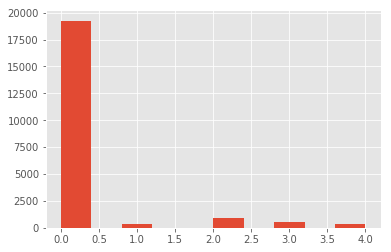

In [1261]:
kc.view.hist(); # plot hist of values in 'view' column
print(kc.view.apply(['mean', 'median', 'std'])) # check mean, median and std with missing values

In [1262]:
print('Percentage of Null View Values:', len(kc[kc.view.isna()])/ len(kc))
print('Number of Unique View Values:', kc.view.nunique())

# Very low percentage (0.2%) of null values in 'view' column
# categorical data

Percentage of Null View Values: 0.0029411764705882353
Number of Unique View Values: 5


In [1263]:
# Using the median instead of the mean as a replacement makes more sense so we have less bias in our data
# The most common value is 0 and the median is 0

median_view = kc.view.median()
kc['view'].fillna(median_view, inplace=True)

kc_median_view = kc.view.fillna(value=median_view)
print(kc_median_view.apply(['mean', 'median', 'std']))

# the mean changed a little, standard deviation is a little bit lower, median is the same, so estimation is ok

print('---------------------------------------------')

kc.isna().sum()
print(kc.view.value_counts(normalize=True))   #check the percent breakdown of each value in the 'view column'

mean      0.233987
median    0.000000
std       0.765437
Name: view, dtype: float64
---------------------------------------------
0.0    0.901774
2.0    0.044631
3.0    0.023576
1.0    0.015359
4.0    0.014659
Name: view, dtype: float64


In [1264]:
# check that there are no more missing values for 'view'
kc.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2353
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3804
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [1265]:
# Next lets deal with the 'waterfront' column. This is a categorical variable with only 2 possible values
# that is missing 2353 values which is about 11% of the data is missing

print('Percentage of Null Waterfront Values:', len(kc[kc.waterfront.isna()])/ len(kc))
print('Number of Unique Waterfront Values:', kc.waterfront.nunique())

Percentage of Null Waterfront Values: 0.10985060690943044
Number of Unique Waterfront Values: 2


0.0    0.992343
1.0    0.007657
Name: waterfront, dtype: float64
---------------------------------------------------
mean      0.007657
median    0.000000
std       0.087172
Name: waterfront, dtype: float64


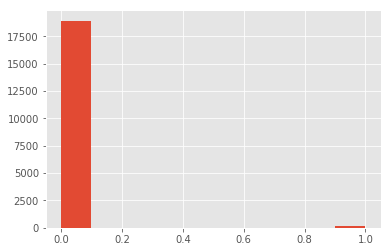

In [1266]:
# Let's visualize the waterfront data with a histogram
kc.waterfront.hist();
print(kc.waterfront.value_counts(normalize=True))
# waterfront properties only account for .007% of the values in the kc dataset
print('---------------------------------------------------')

print(kc.waterfront.apply(['mean', 'median', 'std']))
# We can deal with 'waterfront' data similarly to the 'view' data since 0 is the most frequent value and the median

In [1267]:
# replace missing values in 'waterfront' column with the median value since '0' is 99% of the total values
median_waterfront = kc.waterfront.median()
kc['waterfront'].fillna(median_waterfront, inplace=True)

kc_median_waterfront = kc.waterfront.fillna(value=median_waterfront)
print(kc_median_waterfront.apply(['mean', 'median', 'std']))

# mean is slightly lower, standard deviation is also slightly lower, not a big change so substitution was ok

kc.isna().sum()
print(kc.waterfront.value_counts(normalize=True)) # check the percent breakdown of each value

mean      0.006816
median    0.000000
std       0.082280
Name: waterfront, dtype: float64
0.0    0.993184
1.0    0.006816
Name: waterfront, dtype: float64


In [1268]:
#check that there are no more missing values for 'waterfront'
kc.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3804
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [1269]:
# The last column we have to deal with is 'yr_renovated' which is a categorical variable

print('Percentage of Null yr_renovated Values:', len(kc[kc.yr_renovated.isna()])/ len(kc))
print('Number of Unique yr_renovated Values:', kc.yr_renovated.nunique())

# 17% of data is missing
print('---------------------------------------------------')

print(kc.yr_renovated.apply(['mean', 'median', 'std']))

Percentage of Null yr_renovated Values: 0.17759103641456583
Number of Unique yr_renovated Values: 70
---------------------------------------------------
mean       83.847241
median      0.000000
std       400.436625
Name: yr_renovated, dtype: float64


0.0       0.957993
2014.0    0.004144
2003.0    0.001760
2013.0    0.001760
2007.0    0.001703
2000.0    0.001646
2005.0    0.001646
2004.0    0.001249
2009.0    0.001192
1990.0    0.001192
1989.0    0.001135
2006.0    0.001135
2002.0    0.000965
1991.0    0.000908
1998.0    0.000908
1999.0    0.000851
2008.0    0.000851
2010.0    0.000851
2001.0    0.000851
1983.0    0.000851
1984.0    0.000851
2015.0    0.000795
1985.0    0.000795
1986.0    0.000795
1987.0    0.000795
1994.0    0.000795
1992.0    0.000738
1993.0    0.000681
1997.0    0.000681
1995.0    0.000681
            ...   
1975.0    0.000284
1964.0    0.000227
1981.0    0.000227
1965.0    0.000227
1973.0    0.000227
1963.0    0.000227
1969.0    0.000227
1978.0    0.000170
1960.0    0.000170
1958.0    0.000170
1956.0    0.000170
1955.0    0.000170
1972.0    0.000170
1945.0    0.000170
1967.0    0.000114
1940.0    0.000114
1974.0    0.000114
1962.0    0.000114
1957.0    0.000114
1951.0    0.000057
1946.0    0.000057
1959.0    0.

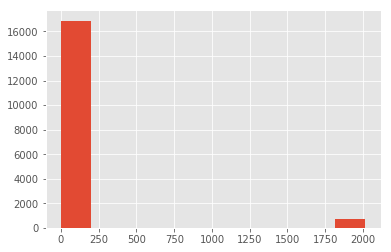

In [1270]:
kc.yr_renovated.hist();
print(kc.yr_renovated.value_counts(normalize=True))

# The histogram shows that the missing values are being input as 'NaN' and no renovation is input as '0.0'
# 95% of the data is input as 0.0 which is a majority.
print(kc.yr_renovated.apply(['mean', 'median', 'std']))
# mean and std did not change much so the substitution is ok

In [1271]:
kc.yr_renovated.unique() # we need to replace nan with the most frequent value '0'

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [1272]:
# replace the missing values in 'yr_renovated' with '0' since it is the most frequent value
kc['yr_renovated'] = kc['yr_renovated'].replace(np.nan, 0.0)
#kc['yr_renovated'] = kc['yr_renovated'].fillna(0)

print(kc.yr_renovated.unique())# we can see that nan is no longer a value
kc.yr_renovated.head()

[   0. 1991. 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984. 1954.
 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999. 1998.
 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971. 1979.
 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963. 1951.
 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975. 1964.
 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]


0       0.0
1    1991.0
2       0.0
3       0.0
4       0.0
Name: yr_renovated, dtype: float64

In [1273]:
#check if yr_renovated is missing any values - should be False 
kc.isna().any()
#kc.info()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

## Visualize and Play with the data before separating into categorical and continuous data

C:\Users\isali\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1296x1080 with 0 Axes>

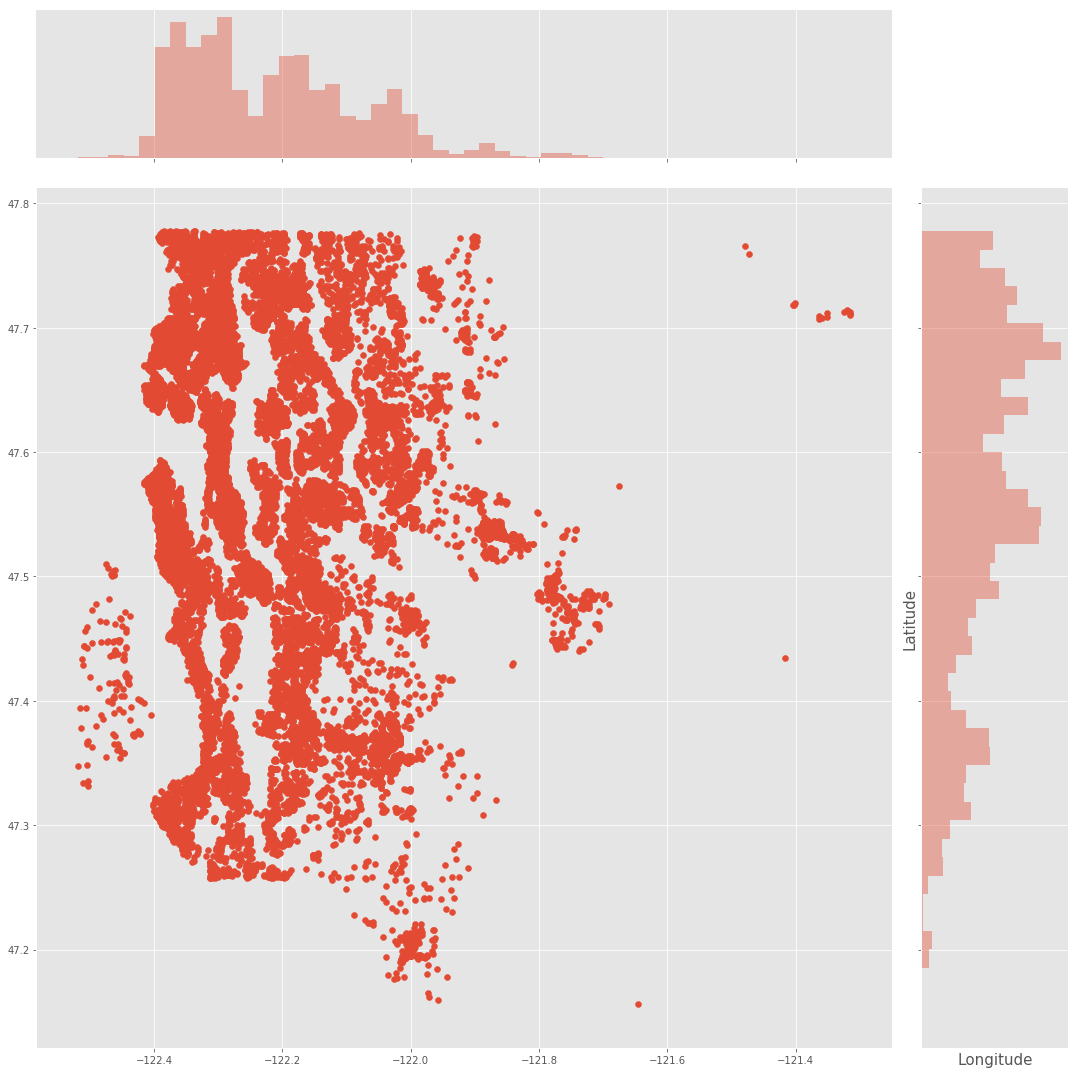

<function seaborn.distributions.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)>

In [1274]:
# Visualize the density of houses in relation to latitude and longitude
# The highest density may mean that it is a favorable location for a house
plt.figure(figsize=(18,15))
sns.jointplot(x=kc.long.values, y=kc.lat.values, size=15)
plt.ylabel('Latitude', fontsize= 15)
plt.xlabel('Longitude', fontsize=15)

plt.show();
sns.distplot

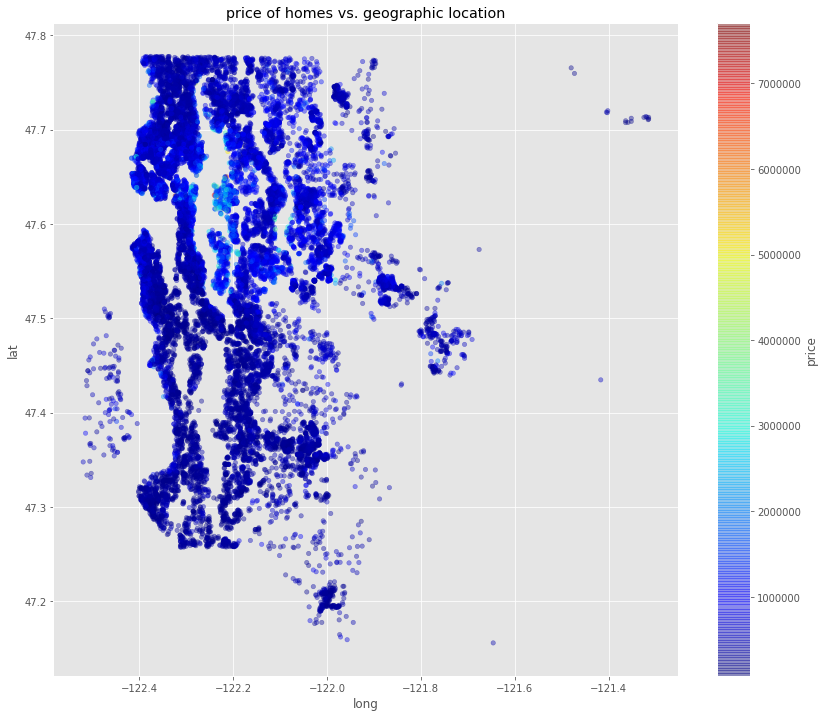

In [1275]:
kc.plot(kind="scatter", x="long", y="lat", alpha=0.4, figsize=(14,12),
    c="price", cmap=plt.get_cmap("jet"), colorbar=True, title='price of homes vs. geographic location',
    sharex=False);

# This plot shows that in general, houses at higher latitude (around 47.6-47.7) are more expensive
# which makes sense since it is near Seattle city center

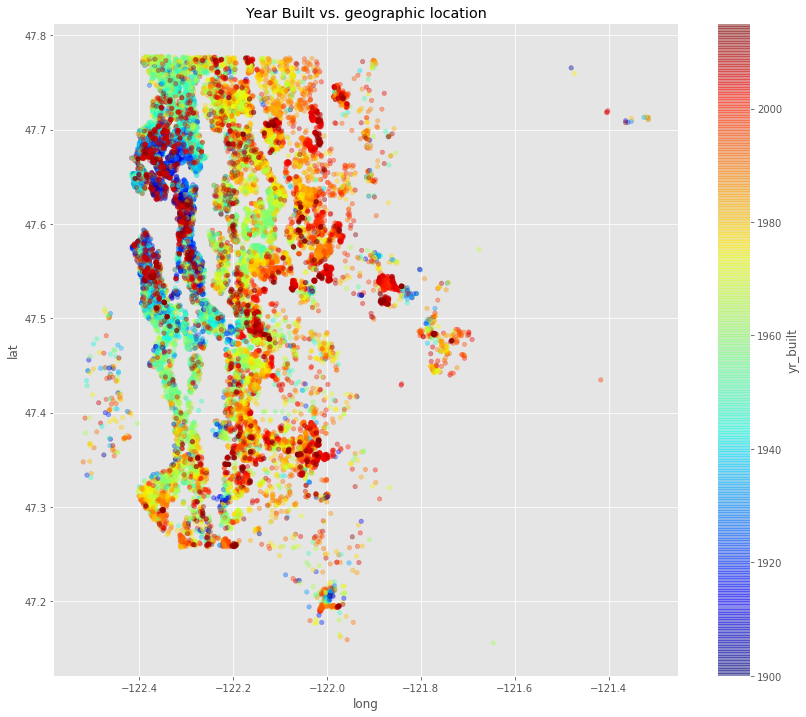

In [1276]:
kc.plot(kind="scatter", x="long", y="lat", alpha=0.4, figsize=(14,12),
    c="yr_built", cmap=plt.get_cmap("jet"), colorbar=True, title='Year Built vs. geographic location',
    sharex=False);

# Older houses were built closer to the city center and have since expanded outwards into more suburban areas
# that don't have such a high housing density

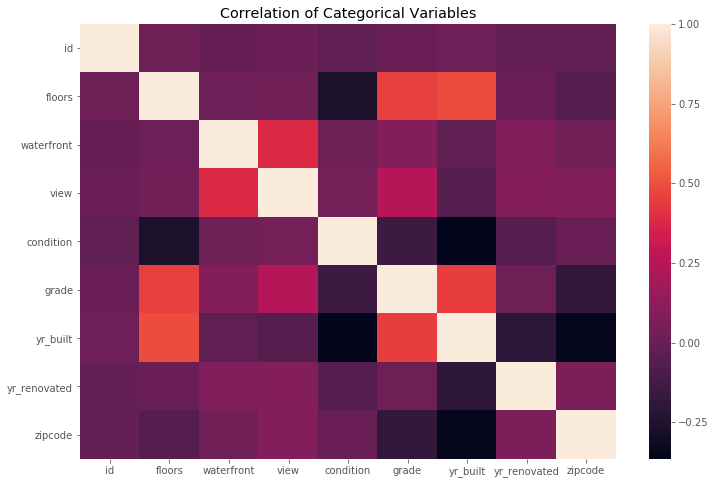

<Figure size 432x288 with 0 Axes>

In [1277]:
# specify categorical and data to get an idea of which variables are correlated
#- Categorical data: floors, waterfront, view, condition, yr_built, yr_renovated, grade, zipcode
#- Continuous data: price, date, bedrooms, bathrooms, sqft_living, sqft_lot, sqft_above, sqft_basement, lat, long, 
#  sqft_living15, sqft_lot15

numcols = ['price','date','bedrooms', 'bathrooms', 'sqft_living','sqft_lot','sqft_above',
           'sqft_basement', 'lat','long','sqft_living15','sqft_lot15']
catcols = [x for x in kc.columns if x not in numcols]

#Lets start by plotting a heatmap to determine if any categorical variables are highly correlated with each other
plt.figure(figsize = (12,8))
sns.heatmap(data=kc[catcols].corr())
plt.title('Correlation of Categorical Variables')
plt.show()
plt.gcf().clear()

# floors seems to be highly correlated with grade and yr_built
# waterfront and view appear to be correlated

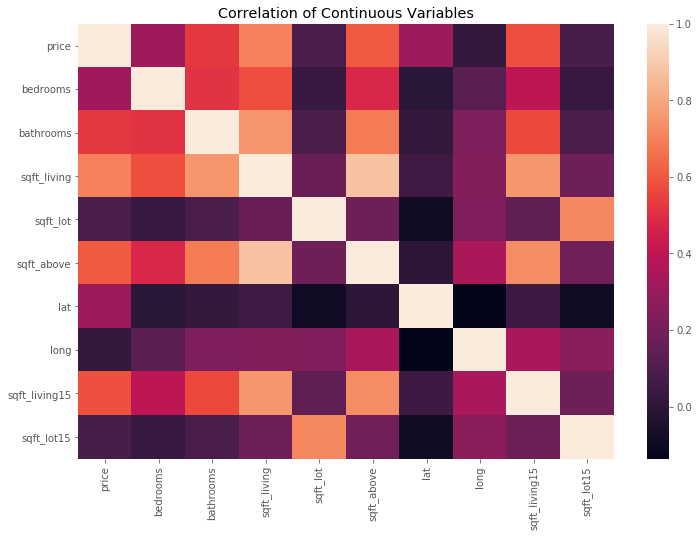

<Figure size 432x288 with 0 Axes>

In [1278]:
# Now plot a heatmap to visualize if any continuous variables are highly correlated with each other
plt.figure(figsize = (12,8))
sns.heatmap(data=kc[numcols].corr())
plt.title('Correlation of Continuous Variables')
plt.show()
plt.gcf().clear()

# our target variable 'price' seems to be highly correlated with bathrooms, sqft_living, sqft_above, sqft_living15
# bathrooms, sqft_living, sqft_above, sqft_living15 seem to be correlated with each other

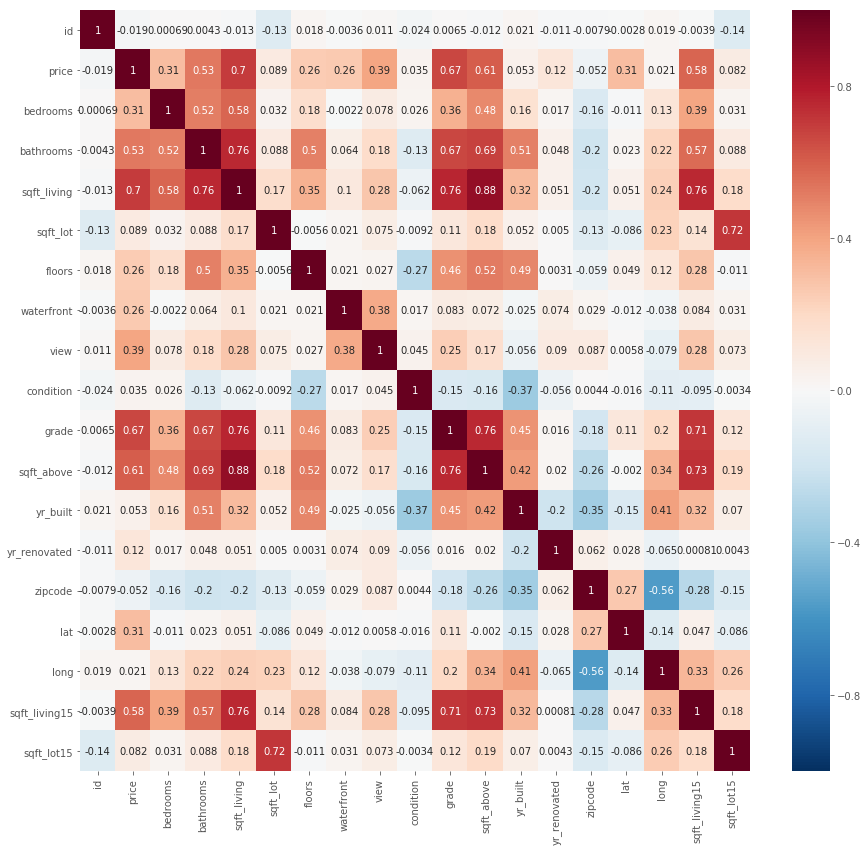

In [1279]:
# Let's get a better idea of the magnitude of correlation 
correlation = kc.corr()
plt.figure(figsize=(15, 14))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

## Binning Categorical Data with many values

In [1280]:
# Since yr_renovated is a categorical variable, lets try putting the years into bins by decade
# first, create bins for based on the values observed. 10 values will result in 9 bins
# I first tried using (0-1940] as a bin, but pd.cut would not allow this, 
# so instead -1 is used so nan values aren't returned
bins = [-1, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
bins_yr_renovated = pd.cut(kc['yr_renovated'], bins)

In [1281]:
kc.yr_renovated.head(5) # We cn see there are many 0 values for no renovation

0       0.0
1    1991.0
2       0.0
3       0.0
4       0.0
Name: yr_renovated, dtype: float64

In [1282]:
# using pd.cut returns unordered categories. Transform this to ordered categories.
bins_yr_renovated = bins_yr_renovated.cat.as_unordered()
bins_yr_renovated.head()

0      (-1, 1940]
1    (1990, 2000]
2      (-1, 1940]
3      (-1, 1940]
4      (-1, 1940]
Name: yr_renovated, dtype: category
Categories (9, interval[int64]): [(-1, 1940], (1940, 1950], (1950, 1960], (1960, 1970], ..., (1980, 1990], (1990, 2000], (2000, 2010], (2010, 2020]]

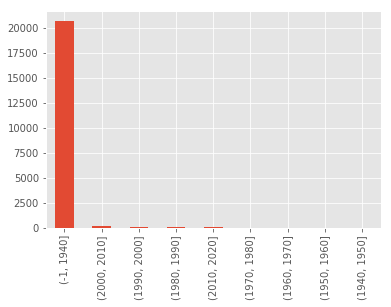

In [1283]:
# plot the ordered values as a bar graph to visualize the newly created bins
# vast majority of houses have never been renovated
bins_yr_renovated.value_counts().plot(kind='bar');

In [1284]:
# replace the existing "yr_renovated" column
kc["yr_renovated"]=bins_yr_renovated

In [1285]:
# we can see that 'yr_renovated' is now listed as a dtype 'category'
kc.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
id               21420 non-null int64
date             21420 non-null object
price            21420 non-null float64
bedrooms         21420 non-null int64
bathrooms        21420 non-null float64
sqft_living      21420 non-null int64
sqft_lot         21420 non-null int64
floors           21420 non-null float64
waterfront       21420 non-null float64
view             21420 non-null float64
condition        21420 non-null int64
grade            21420 non-null int64
sqft_above       21420 non-null int64
sqft_basement    21420 non-null object
yr_built         21420 non-null int64
yr_renovated     21420 non-null category
zipcode          21420 non-null int64
lat              21420 non-null float64
long             21420 non-null float64
sqft_living15    21420 non-null int64
sqft_lot15       21420 non-null int64
dtypes: category(1), float64(7), int64(11), object(2)
memory usage: 3.5+ M

In [1286]:
# Let's bin the 'yr_built' category as well for consistency purposes
# First check the unique values to get an idea of what bins should be. Let's try by decade
# print(kc.yr_built.value_counts())

bins = [0, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]

bins_yr_built = pd.cut(kc['yr_built'], bins)

In [1287]:
# using pd.cut returns unordered categories. Transform this to ordered categories.
bins_yr_built = bins_yr_built.cat.as_unordered()
# bins_yr_built.head()
bins_yr_built.value_counts()

(2000, 2010]    3431
(1960, 1970]    2513
(1950, 1960]    2416
(1970, 1980]    2376
(1980, 1990]    2344
(1990, 2000]    2122
(1940, 1950]    1833
(1920, 1930]    1171
(2010, 2020]    1095
(1910, 1920]     764
(1900, 1910]     687
(1930, 1940]     582
(0, 1900]         86
Name: yr_built, dtype: int64

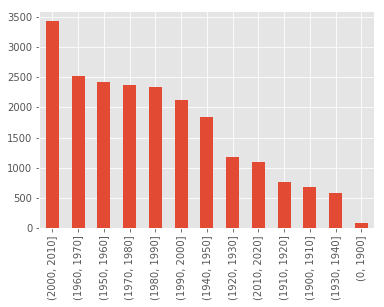

In [1288]:
# Visualize the values in bins
# Majority of houses were built from 2000-2009
bins_yr_built.value_counts().plot(kind='bar');

In [1289]:
# replace the existing "yr_renovated" column
kc["yr_built"]=bins_yr_built

In [1290]:
# we can see that 'yr_built' is now listed as a dtype 'category'
kc.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
id               21420 non-null int64
date             21420 non-null object
price            21420 non-null float64
bedrooms         21420 non-null int64
bathrooms        21420 non-null float64
sqft_living      21420 non-null int64
sqft_lot         21420 non-null int64
floors           21420 non-null float64
waterfront       21420 non-null float64
view             21420 non-null float64
condition        21420 non-null int64
grade            21420 non-null int64
sqft_above       21420 non-null int64
sqft_basement    21420 non-null object
yr_built         21420 non-null category
yr_renovated     21420 non-null category
zipcode          21420 non-null int64
lat              21420 non-null float64
long             21420 non-null float64
sqft_living15    21420 non-null int64
sqft_lot15       21420 non-null int64
dtypes: category(2), float64(7), int64(10), object(2)
memory usage: 3.3

## Checking for any hidden extraneous values

In [1291]:
# Check all columns for extraneous values 
for col in kc.columns:
    print(col, '\n', kc[col].value_counts(normalize=True).head(), '\n\n') 

id 
 2911700010    0.000047
5450300010    0.000047
5104511600    0.000047
1160000115    0.000047
686530110     0.000047
Name: id, dtype: float64 


date 
 6/23/2014    0.006629
6/26/2014    0.006116
6/25/2014    0.006116
7/8/2014     0.005929
4/27/2015    0.005882
Name: date, dtype: float64 


price 
 350000.0    0.008030
450000.0    0.007983
550000.0    0.007283
500000.0    0.007049
425000.0    0.007003
Name: price, dtype: float64 


bedrooms 
 3    0.454295
4    0.319748
2    0.127731
5    0.074043
6    0.012372
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.249860
1.00    0.177124
1.75    0.140990
2.25    0.094818
2.00    0.089309
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006349
1440    0.006209
1400    0.006162
1660    0.005976
1800    0.005976
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016573
6000    0.013352
4000    0.011625
7200    0.010177
7500    0.005509
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.492624
2.0    0.382960
1.5    

In [1292]:
# Let's change sqft_basement from an object type to a int type
kc['sqft_basement'] = pd.to_numeric(kc['sqft_basement'])
kc['sqft_basement'].head(5)

ValueError: Unable to parse string "?" at position 6

In [1293]:
kc.sqft_basement.value_counts(normalize=True)  # We can see '?' appears 2% of the values
len(kc[(kc.sqft_basement=='?') ])   # The number of times '?' appears as a value

452

In [1294]:
kc.sqft_basement.value_counts(normalize=True)

#Let's try a different method
#Method: randomly select a class acccording to current distribution
rel_prob = [.61, .01, .0099, .0099, .0093]
prob = [i/sum(rel_prob) for i in rel_prob]
def impute_sqft_basement(value):
    if value == '?':
        return np.random.choice(['0.0','600.0','700.0', '500.0', '800.0'], p=prob)
    else:
        return value
kc.sqft_basement = kc.sqft_basement.map(lambda x: impute_sqft_basement(x))
kc.sqft_basement.value_counts(normalize=True)  # no longer has '?'

0.0       0.613352
600.0     0.010364
700.0     0.010084
500.0     0.009944
800.0     0.009711
400.0     0.008590
1000.0    0.006816
300.0     0.006583
900.0     0.006583
200.0     0.004809
480.0     0.004809
750.0     0.004715
530.0     0.004715
450.0     0.004715
720.0     0.004575
620.0     0.004155
580.0     0.003922
840.0     0.003828
420.0     0.003782
860.0     0.003688
1100.0    0.003641
670.0     0.003595
550.0     0.003548
780.0     0.003501
240.0     0.003455
650.0     0.003455
380.0     0.003408
680.0     0.003361
360.0     0.003315
940.0     0.003315
            ...   
556.0     0.000047
3480.0    0.000047
248.0     0.000047
143.0     0.000047
2050.0    0.000047
862.0     0.000047
1913.0    0.000047
784.0     0.000047
274.0     0.000047
2390.0    0.000047
1284.0    0.000047
417.0     0.000047
516.0     0.000047
172.0     0.000047
2360.0    0.000047
2190.0    0.000047
1798.0    0.000047
207.0     0.000047
792.0     0.000047
2610.0    0.000047
2580.0    0.000047
295.0     0.

In [1295]:
len(kc[(kc.sqft_basement=='?') ])   # The number of times '?' appears is now '0'

0

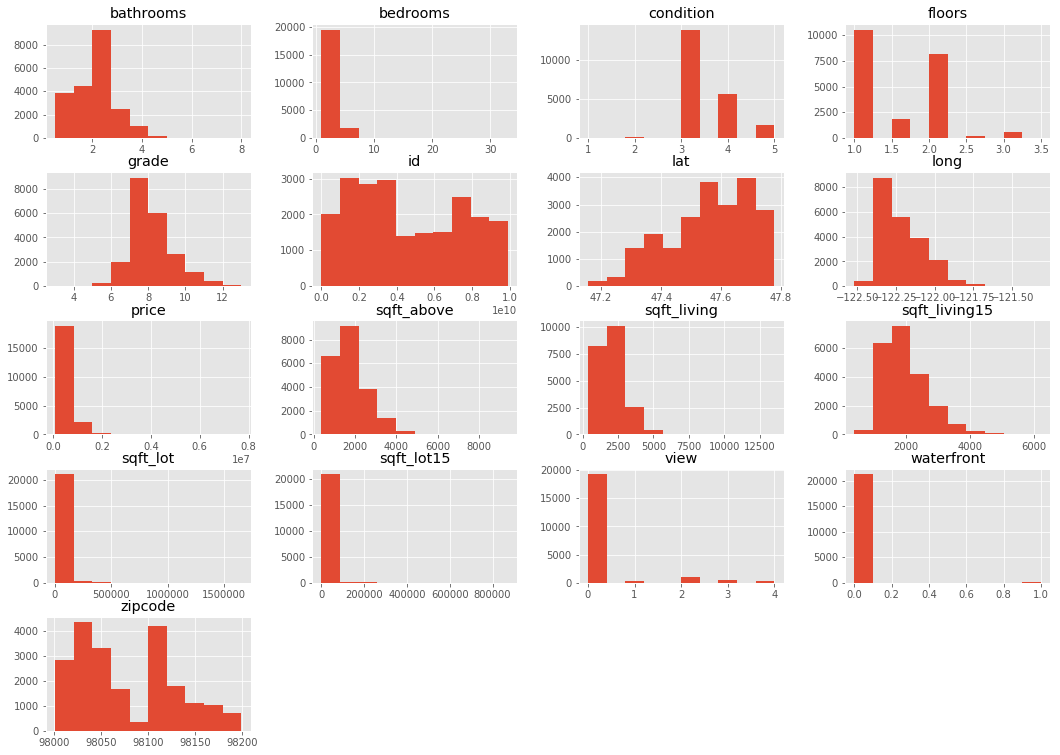

In [1296]:
#Let's visualize the distributions to see which variables are categorical and continuous
kc.hist(figsize=(18,13) );

# much of our data is skewed with long tails to the right. Condition, floors, view, waterfront and zipcode are categorical

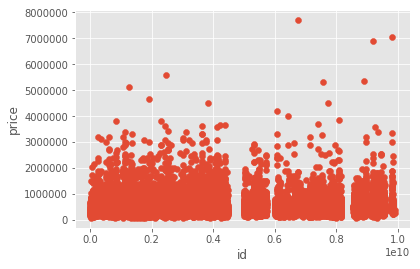

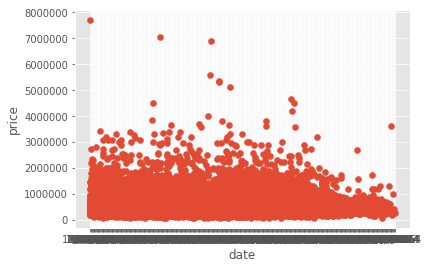

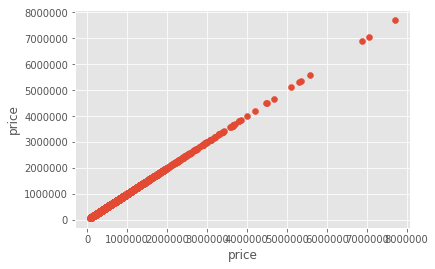

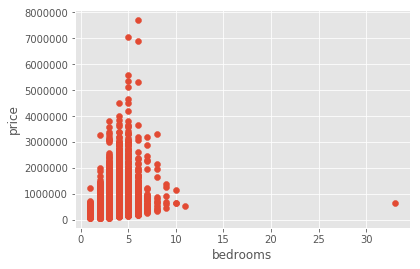

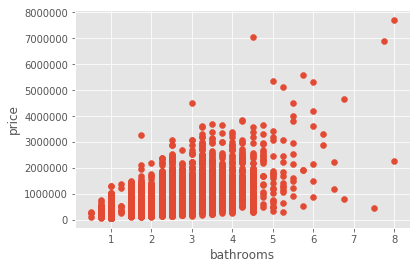

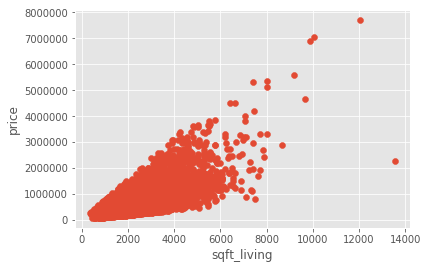

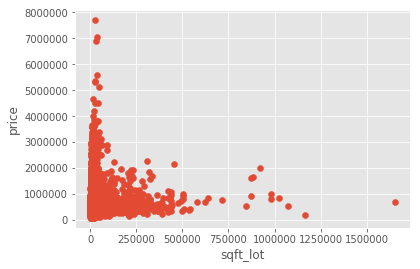

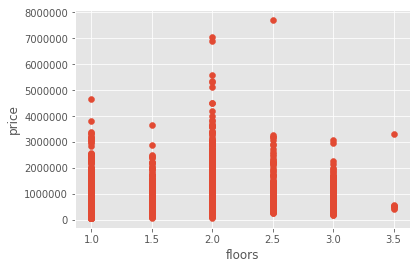

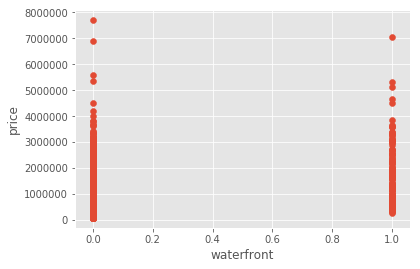

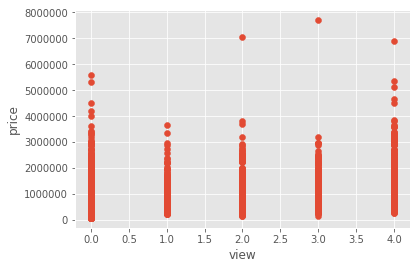

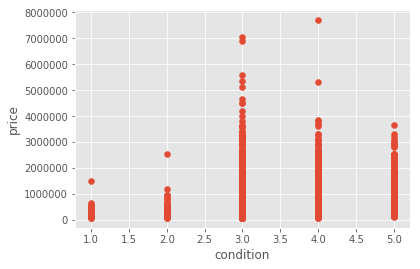

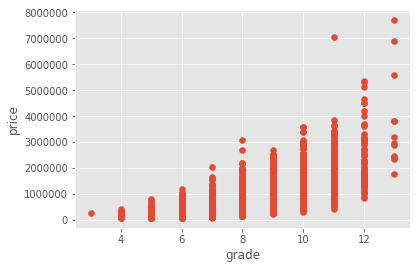

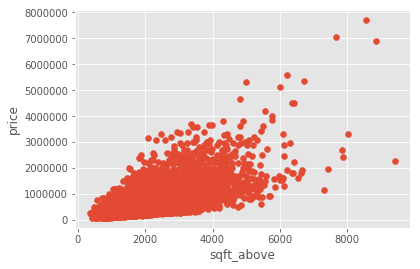

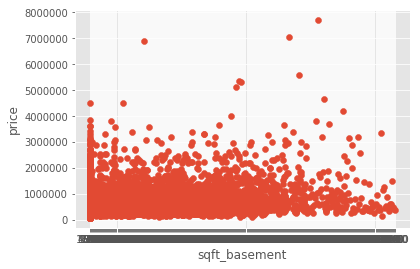

TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'

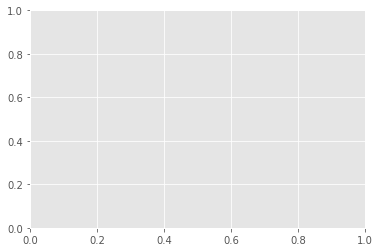

In [1297]:
#Plot all the independent variables vs the target variable to visualize the relationships
# there seems to be some heteroskedacity for continuous variables: bathrooms, sqft_living, sqft_above, sqft_basement
# clear categorical data in lines
for i in kc:
    plt.scatter(kc[i], kc['price'])
    plt.xlabel(i)
    plt.ylabel('price')
    plt.show()

Observations:

- many of the variables have skewed distributions - transforming the data may be useful
- Categorical data: bedrooms, bathrooms, floors, waterfront, view, condition, yr_built, yr_renovated, grade, zipcode
- Continuous data: date, sqft_living, sqft_lot, sqft_above, lat, long, sqft_living15, sqft_lot15

## Let's start using linear regressions

In [1298]:
kc.describe() # Let's have a quick look at basic stats of our data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.142000e+04,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000
mean,4.580940e+09,5.407393e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,0.006816,0.233987,3.410784,7.662792,1791.170215,98077.87437,47.560197,-122.213784,1988.384080,12775.718161
std,2.876761e+09,3.679311e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.082280,0.765437,0.650035,1.171971,828.692965,53.47748,0.138589,0.140791,685.537057,27345.621867
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000
25%,2.123537e+09,3.225000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904921e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000


King County Housing DataSet - Regression Analysis and Diagnostics for formula: price~bedrooms
-------------------------------------------------------------------------------------


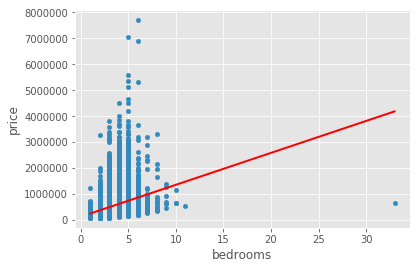

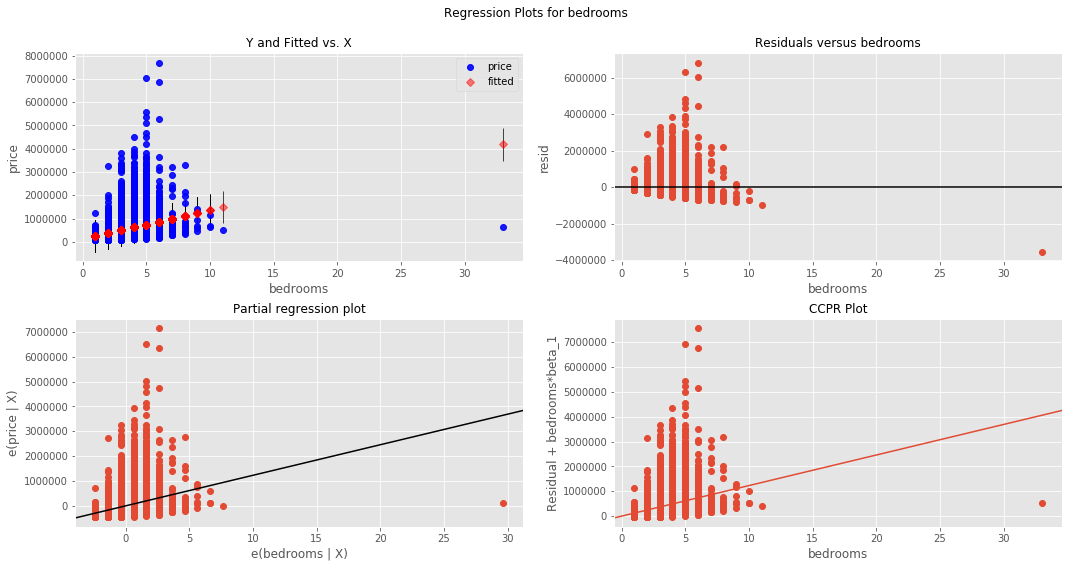

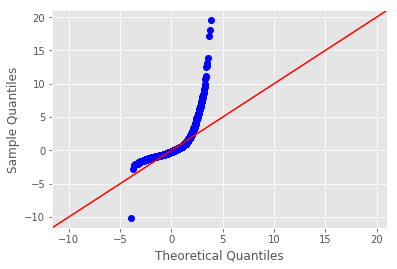

Press Enter to continue...
King County Housing DataSet - Regression Analysis and Diagnostics for formula: price~bathrooms
-------------------------------------------------------------------------------------


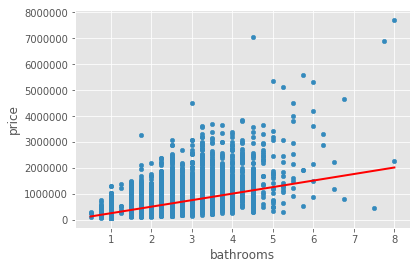

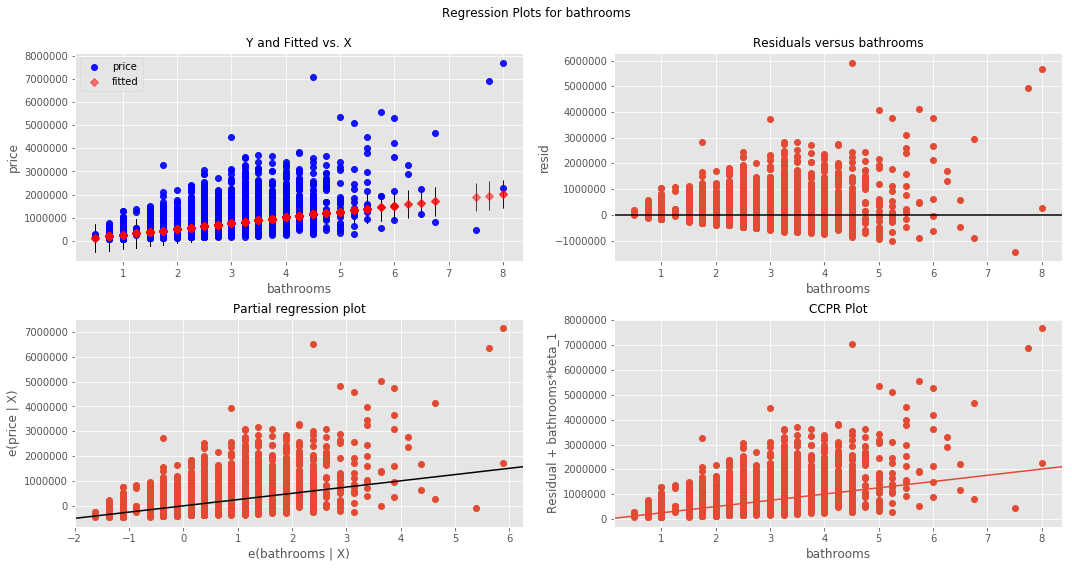

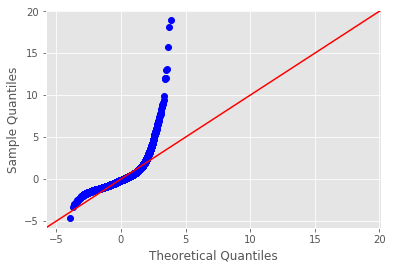

Press Enter to continue...
King County Housing DataSet - Regression Analysis and Diagnostics for formula: price~sqft_living
-------------------------------------------------------------------------------------


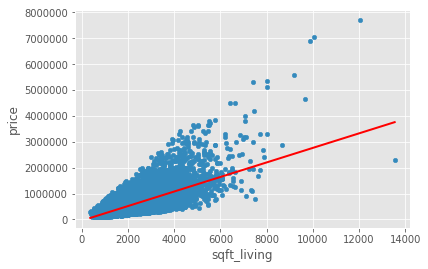

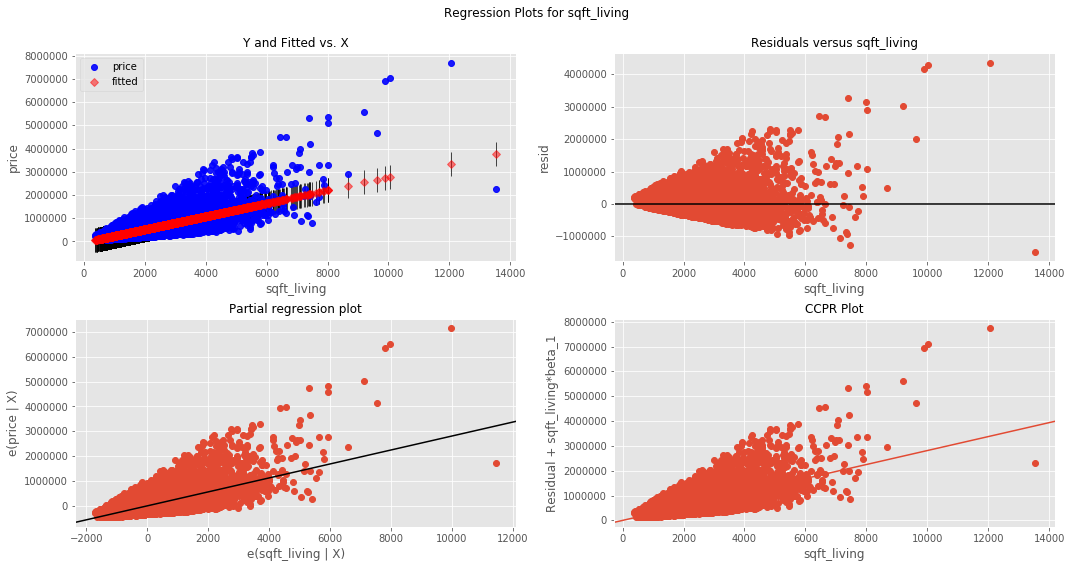

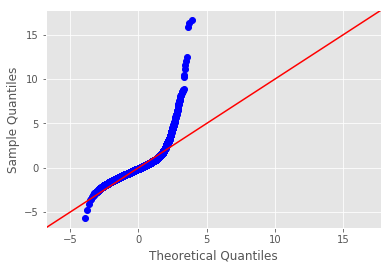

Press Enter to continue...
King County Housing DataSet - Regression Analysis and Diagnostics for formula: price~sqft_lot
-------------------------------------------------------------------------------------


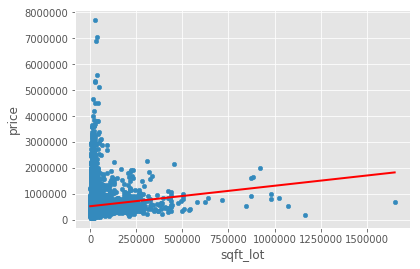

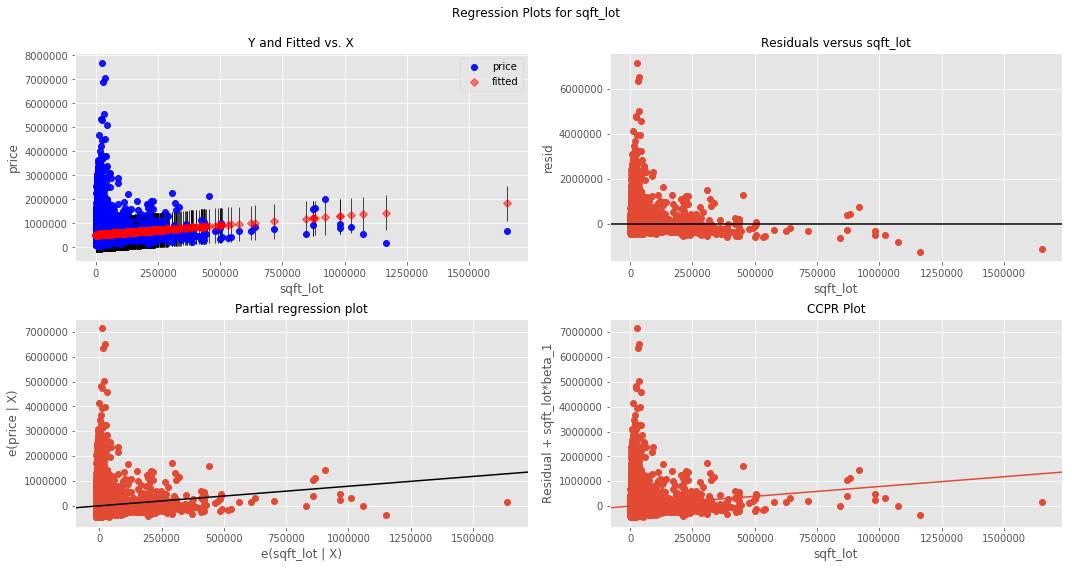

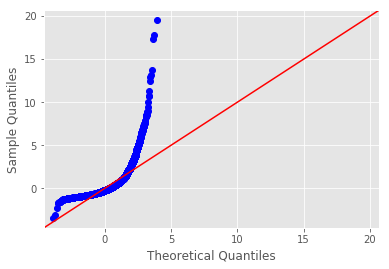

Press Enter to continue...
King County Housing DataSet - Regression Analysis and Diagnostics for formula: price~sqft_above
-------------------------------------------------------------------------------------


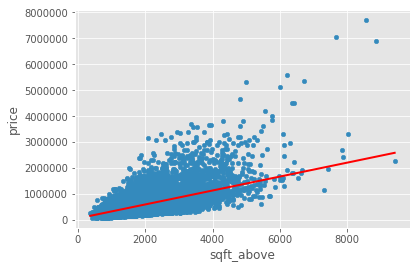

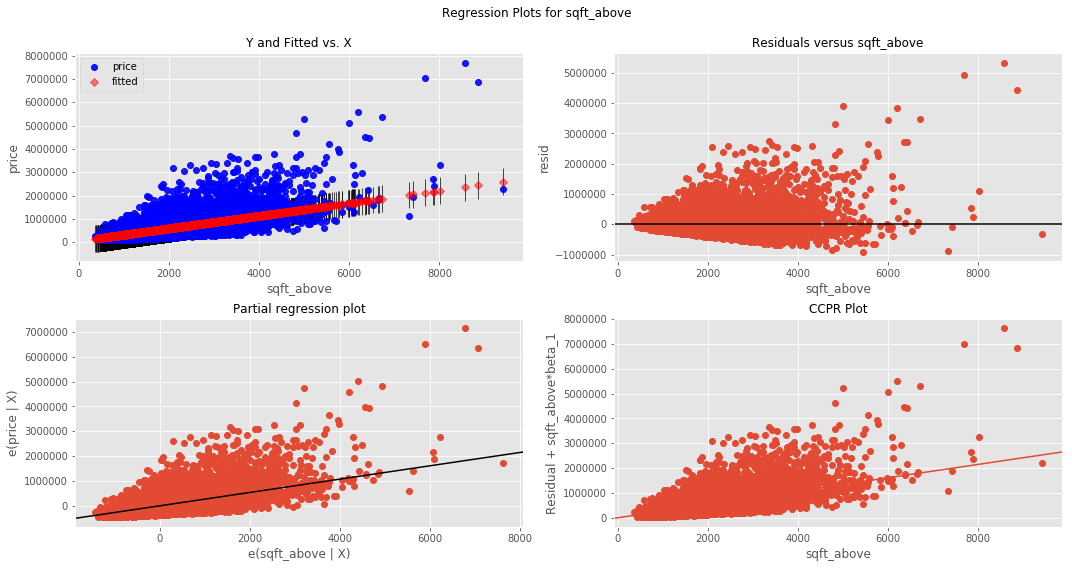

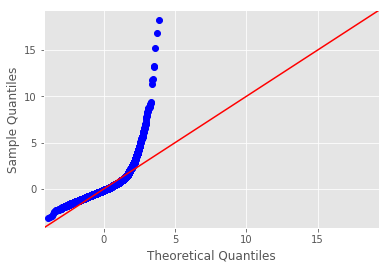

Press Enter to continue...
King County Housing DataSet - Regression Analysis and Diagnostics for formula: price~sqft_living15
-------------------------------------------------------------------------------------


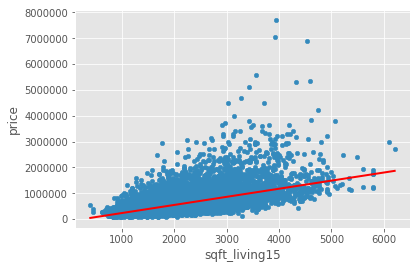

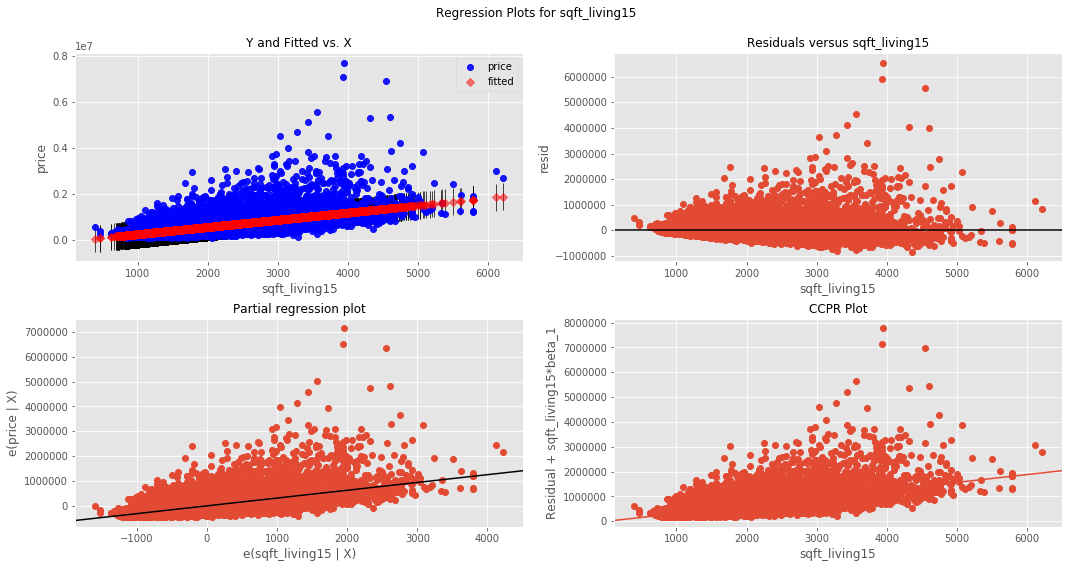

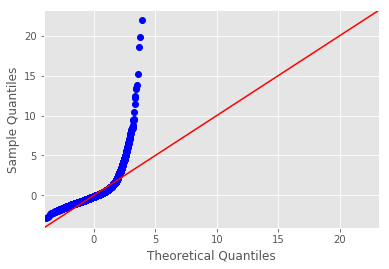

Press Enter to continue...
King County Housing DataSet - Regression Analysis and Diagnostics for formula: price~sqft_lot15
-------------------------------------------------------------------------------------


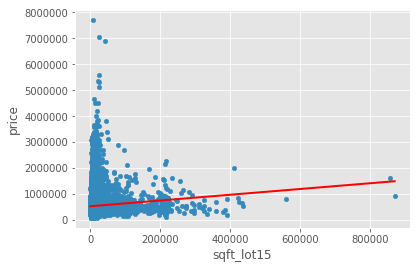

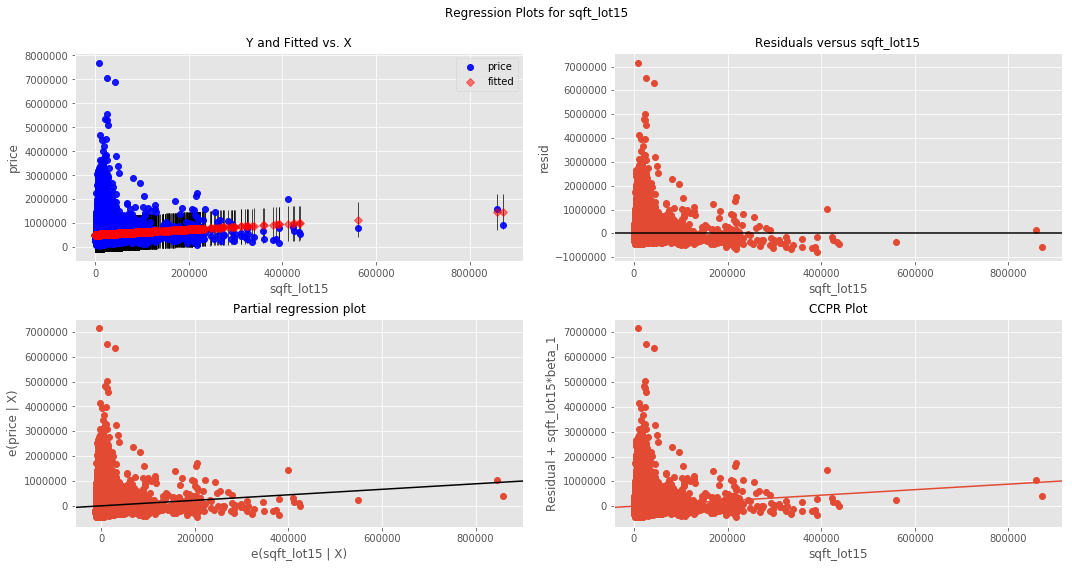

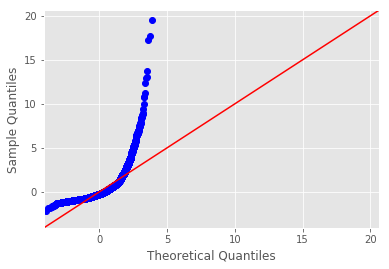

Press Enter to continue...


In [1299]:
# We have a lot of variables in this dataset so lets pick a few chosen continuous independent variables
# By plotting the residuals and the qq plots we can see how the distribution compares to a normal distribution
# So we can see if transformations are needed 

results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ]]
for idx, val in enumerate(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                           'sqft_above', 'sqft_living15', 'sqft_lot15']):
    print ("King County Housing DataSet - Regression Analysis and Diagnostics for formula: price~" + val)
    print ("-------------------------------------------------------------------------------------")

    f = 'price~' + val
#   
    model = smf.ols(formula=f, data=kc).fit()
    
    X_new = pd.DataFrame({val: [kc[val].min(), kc[val].max()]});
    preds = model.predict(X_new)
    kc.plot(kind='scatter', x=val, y='price');
    plt.plot(X_new, preds, c='red', linewidth=2);
    plt.show()
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True,   )
    plt.show()
    
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0] ])
    input("Press Enter to continue...")


In [1300]:
pd.DataFrame(results)
# sqft_living and grade have the highest r_squared values but they still aren't good. Definitely needs preprocessing

,0,1,2,3,4,5
0,ind_var,r_squared,intercept,slope,p-value,normality (JB)
1,bedrooms,0.0957611,125625,123035,0,1.18858e+06
2,bathrooms,0.276917,7174.8,251868,0,876438
3,sqft_living,0.492629,-44749.2,281.062,0,538458
4,sqft_lot,0.00794077,528796,0.789455,5.07357e-39,1.14026e+06
5,sqft_above,0.366381,59372.6,268.744,0,724389
6,sqft_living15,0.341697,-83076.6,313.73,0,1.8936e+06
7,sqft_lot15,0.00679596,526569,1.10919,1.26637e-33,1.13511e+06


Some observations:

- Number of bedrooms has a positive relationship with price. Has a low r-squared so not a good fit. Skewed but normal distribution, qqplot has long tail which hurts normality. 

- Number of bathrooms has a positive relationship with price. Data looks categorical. Residual plots show heteroscadasticity - cone shaped residuals. Not normally distributed, qq plot has long tail

- sqft_living has a positive relationship with price. Has a high r squared value so this model fits this variable better. Residual plots show heteroscadascity, qqplot has long tail

- sqft_lot has a positive relationship with price. Very low r squared value, model does not fit. Heteroscadastic distribution of residuals. QQ plot has long tail

- sqft_above has a positive relationship with price. Has one of the higher r squared values so the model fits this variable better. QQ plot has long tail

- sqft_living15 has a positive relationship with price. has one of the higher r squared values so the model fits this variable better. QQ plot has long tail

- sqft_lot15 has a positive relationship with price. Has a low r squared value so the model does not fit well. QQplot has long tail

#Since all the continuous variables have long tails in their qqplots, it may be a good idea to perform a log transformation on all of these variables

## Let's Create Dummies for our Categorical Data

In [1301]:
# kc.info()
# Now let's change categorical data to dtype 'category'
# and then create dummy variables for each categorical variable
kc['waterfront'] = kc['waterfront'].astype('category')
kc['condition'] = kc['condition'].astype('category')
kc['floors'] = kc['floors'].astype('category')
kc['grade'] = kc['grade'].astype('category')
kc['view'] = kc['view'].astype('category')
kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
id               21420 non-null int64
date             21420 non-null object
price            21420 non-null float64
bedrooms         21420 non-null int64
bathrooms        21420 non-null float64
sqft_living      21420 non-null int64
sqft_lot         21420 non-null int64
floors           21420 non-null category
waterfront       21420 non-null category
view             21420 non-null category
condition        21420 non-null category
grade            21420 non-null category
sqft_above       21420 non-null int64
sqft_basement    21420 non-null object
yr_built         21420 non-null category
yr_renovated     21420 non-null category
zipcode          21420 non-null int64
lat              21420 non-null float64
long             21420 non-null float64
sqft_living15    21420 non-null int64
sqft_lot15       21420 non-null int64
dtypes: category(7), float64(4), int64(8), object(2)
memory us

In [1302]:
# Create dummy variables for waterfront, specify drop_first as True so we don't introduce multicollinearity into data
waterfront_dummy = pd.get_dummies(kc.waterfront, prefix="waterfront", drop_first = True)
kc = kc.drop(["waterfront"], axis=1)  # drop original waterfront column
kc = pd.concat([kc, waterfront_dummy], axis=1) # add dummies to dataframe
kc.head() #preview

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront_1.0
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,...,1180,0.0,"(1950, 1960]","(-1, 1940]",98178,47.5112,-122.257,1340,5650,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,...,2170,400.0,"(1950, 1960]","(1990, 2000]",98125,47.7210,-122.319,1690,7639,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,...,770,0.0,"(1930, 1940]","(-1, 1940]",98028,47.7379,-122.233,2720,8062,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,...,1050,910.0,"(1960, 1970]","(-1, 1940]",98136,47.5208,-122.393,1360,5000,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,...,1680,0.0,"(1980, 1990]","(-1, 1940]",98074,47.6168,-122.045,1800,7503,0


In [1303]:
# Do the same as we did for waterfront to floors
floors_dummy = pd.get_dummies(kc.floors, prefix="floors", drop_first = True)
kc = kc.drop(["floors"], axis=1)
kc = pd.concat([kc, floors_dummy], axis=1)
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,waterfront_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,0.0,3,7,...,47.5112,-122.257,1340,5650,0,0,0,0,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,0.0,3,7,...,47.7210,-122.319,1690,7639,0,0,1,0,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,0.0,3,6,...,47.7379,-122.233,2720,8062,0,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,0.0,5,7,...,47.5208,-122.393,1360,5000,0,0,0,0,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,0.0,3,8,...,47.6168,-122.045,1800,7503,0,0,0,0,0,0


In [1304]:
view_dummy = pd.get_dummies(kc.view, prefix="view", drop_first = True)
kc = kc.drop(["view"], axis=1)
kc = pd.concat([kc, view_dummy], axis=1)
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,sqft_above,...,waterfront_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,view_1.0,view_2.0,view_3.0,view_4.0
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,3,7,1180,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,3,7,2170,...,0,0,1,0,0,0,0,0,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,3,6,770,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,5,7,1050,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,3,8,1680,...,0,0,0,0,0,0,0,0,0,0


In [1305]:
condition_dummy = pd.get_dummies(kc.condition, prefix="condition", drop_first = True)
kc = kc.drop(["condition"], axis=1)
kc = pd.concat([kc, condition_dummy], axis=1)
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,grade,sqft_above,sqft_basement,...,floors_3.0,floors_3.5,view_1.0,view_2.0,view_3.0,view_4.0,condition_2,condition_3,condition_4,condition_5
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,7,1180,0.0,...,0,0,0,0,0,0,0,1,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,7,2170,400.0,...,0,0,0,0,0,0,0,1,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,6,770,0.0,...,0,0,0,0,0,0,0,1,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,7,1050,910.0,...,0,0,0,0,0,0,0,0,0,1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,8,1680,0.0,...,0,0,0,0,0,0,0,1,0,0


In [1306]:
grade_dummy = pd.get_dummies(kc.grade, prefix="grade", drop_first = True)
kc = kc.drop(["grade"], axis=1)
kc = pd.concat([kc, grade_dummy], axis=1)
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1180,0.0,"(1950, 1960]",...,0,0,0,1,0,0,0,0,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2170,400.0,"(1950, 1960]",...,0,0,0,1,0,0,0,0,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,770,0.0,"(1930, 1940]",...,0,0,1,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1050,910.0,"(1960, 1970]",...,0,0,0,1,0,0,0,0,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1680,0.0,"(1980, 1990]",...,0,0,0,0,1,0,0,0,0,0


In [1307]:
yr_built_dummy = pd.get_dummies(kc.yr_built, prefix="yr_built", drop_first = True)
kc = kc.drop(["yr_built"], axis=1)
kc = pd.concat([kc, yr_built_dummy], axis=1)
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_renovated,...,"yr_built_(1920, 1930]","yr_built_(1930, 1940]","yr_built_(1940, 1950]","yr_built_(1950, 1960]","yr_built_(1960, 1970]","yr_built_(1970, 1980]","yr_built_(1980, 1990]","yr_built_(1990, 2000]","yr_built_(2000, 2010]","yr_built_(2010, 2020]"
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1180,0.0,"(-1, 1940]",...,0,0,0,1,0,0,0,0,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2170,400.0,"(1990, 2000]",...,0,0,0,1,0,0,0,0,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,770,0.0,"(-1, 1940]",...,0,1,0,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1050,910.0,"(-1, 1940]",...,0,0,0,0,1,0,0,0,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1680,0.0,"(-1, 1940]",...,0,0,0,0,0,0,1,0,0,0


In [1308]:
yr_renovated_dummy = pd.get_dummies(kc.yr_renovated, prefix="yr_renovated", drop_first = True)
kc = kc.drop(["yr_renovated"], axis=1)
kc = pd.concat([kc, yr_renovated_dummy], axis=1)
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,zipcode,...,"yr_built_(2000, 2010]","yr_built_(2010, 2020]","yr_renovated_(1940, 1950]","yr_renovated_(1950, 1960]","yr_renovated_(1960, 1970]","yr_renovated_(1970, 1980]","yr_renovated_(1980, 1990]","yr_renovated_(1990, 2000]","yr_renovated_(2000, 2010]","yr_renovated_(2010, 2020]"
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1180,0.0,98178,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2170,400.0,98125,...,0,0,0,0,0,0,0,1,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,770,0.0,98028,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1050,910.0,98136,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1680,0.0,98074,...,0,0,0,0,0,0,0,0,0,0


In [1309]:
# preview all of our column titles, we can see that all categories with dummies dropped the first column
kc.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'sqft_above', 'sqft_basement', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'waterfront_1.0', 'floors_1.5',
       'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5', 'view_1.0',
       'view_2.0', 'view_3.0', 'view_4.0', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'grade_4', 'grade_5', 'grade_6',
       'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12',
       'grade_13', 'yr_built_(1900, 1910]', 'yr_built_(1910, 1920]',
       'yr_built_(1920, 1930]', 'yr_built_(1930, 1940]',
       'yr_built_(1940, 1950]', 'yr_built_(1950, 1960]',
       'yr_built_(1960, 1970]', 'yr_built_(1970, 1980]',
       'yr_built_(1980, 1990]', 'yr_built_(1990, 2000]',
       'yr_built_(2000, 2010]', 'yr_built_(2010, 2020]',
       'yr_renovated_(1940, 1950]', 'yr_renovated_(1950, 1960]',
       'yr_renovated_(1960, 1970]', 'yr_renovated_(1970, 1980]',
      

In [1310]:
# Let's drop zip code since that would create too many columns for this current analysis
kc = kc.drop(["zipcode"], axis=1)
# Let's drop date sold since it won't be very helpful to our question
kc = kc.drop(["date"], axis=1)
# Let's drop 'id' since it doesn't mean much in correlation with price
kc = kc.drop(["id"], axis=1)

In [1311]:
kc.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,lat,long,sqft_living15,...,"yr_built_(2000, 2010]","yr_built_(2010, 2020]","yr_renovated_(1940, 1950]","yr_renovated_(1950, 1960]","yr_renovated_(1960, 1970]","yr_renovated_(1970, 1980]","yr_renovated_(1980, 1990]","yr_renovated_(1990, 2000]","yr_renovated_(2000, 2010]","yr_renovated_(2010, 2020]"
0,221900.0,3,1.00,1180,5650,1180,0.0,47.5112,-122.257,1340,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,2170,400.0,47.7210,-122.319,1690,...,0,0,0,0,0,0,0,1,0,0
2,180000.0,2,1.00,770,10000,770,0.0,47.7379,-122.233,2720,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1050,910.0,47.5208,-122.393,1360,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1680,0.0,47.6168,-122.045,1800,...,0,0,0,0,0,0,0,0,0,0


## Check Correlation and Collinearity


In [1312]:
# slice only the continuous data [rows,columns]
kc_cont = kc.iloc[:,0:11]
print(kc_cont.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')


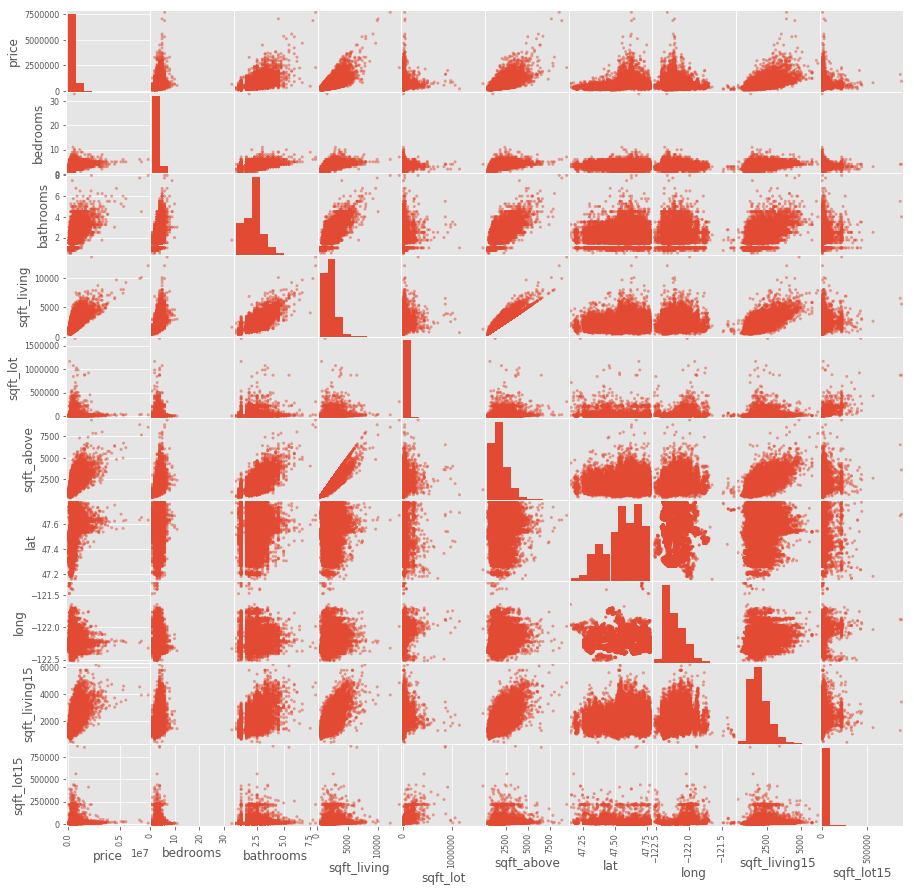

In [1313]:
# create a scatter matrix to visualize distributions of all continuous data variables
pd.plotting.scatter_matrix(kc_cont,figsize  = [15, 15]);

In [1314]:
# check correlation of continuous variables
kc_cont.corr() 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.309453,0.526229,0.701875,0.089111,0.605294,0.305744,0.020983,0.584549,0.082438
bedrooms,0.309453,1.000000,0.515383,0.579069,0.032490,0.480242,-0.011266,0.132439,0.394949,0.030570
bathrooms,0.526229,0.515383,1.000000,0.755522,0.087779,0.686328,0.023143,0.223808,0.569453,0.087760
sqft_living,0.701875,0.579069,0.755522,1.000000,0.172586,0.876533,0.050739,0.240212,0.756186,0.183837
sqft_lot,0.089111,0.032490,0.087779,0.172586,1.000000,0.183210,-0.085822,0.230265,0.143805,0.717743
sqft_above,0.605294,0.480242,0.686328,0.876533,0.183210,1.000000,-0.002040,0.344161,0.731887,0.194445
lat,0.305744,-0.011266,0.023143,0.050739,-0.085822,-0.002040,1.000000,-0.136228,0.047485,-0.086223
long,0.020983,0.132439,0.223808,0.240212,0.230265,0.344161,-0.136228,1.000000,0.334679,0.255420
sqft_living15,0.584549,0.394949,0.569453,0.756186,0.143805,0.731887,0.047485,0.334679,1.000000,0.182765
sqft_lot15,0.082438,0.030570,0.087760,0.183837,0.717743,0.194445,-0.086223,0.255420,0.182765,1.000000


# Observations

- There is a high correlation between sqft_living and price and sqft_above and price
- Bathrooms, Sqft_basement and Latitude both are also positively correlated with price
- Latitude seems to have a higher correlation with price than longitude which matches our previous visualizations
- longitude, sqft_lot, sqft_lot15 have low correlation

In [1315]:
abs(kc_cont.corr())>0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False
sqft_living,False,False,True,True,False,True,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False
sqft_above,False,False,False,True,False,True,False,False,False,False
lat,False,False,False,False,False,False,True,False,False,False
long,False,False,False,False,False,False,False,True,False,False
sqft_living15,False,False,False,True,False,False,False,False,True,False
sqft_lot15,False,False,False,False,False,False,False,False,False,True


In [1316]:
# sqft_living is most problematic since it is highly correlated the most variables so remove this from dataset
kc = kc.drop("sqft_living",axis=1)

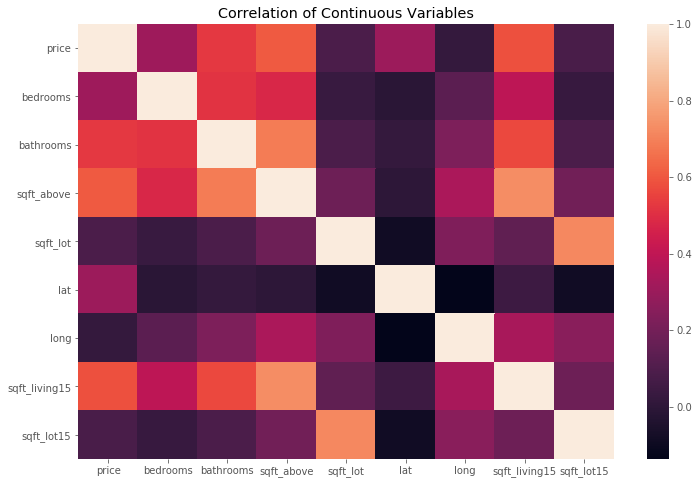

<Figure size 432x288 with 0 Axes>

In [1317]:
#kc.head()
# specify categorical and data and see which variables are correlated
#- Categorical data: bedrooms, bathrooms, floors, waterfront, view, condition, yr_built, yr_renovated, grade
#- Continuous data: sqft_lot, sqft_above, sqft_basement, lat, long, sqft_living15, sqft_lot15

numcols = ['price','bedrooms','bathrooms','sqft_above','sqft_lot','sqft_basement', 
           'lat','long','sqft_living15','sqft_lot15']
catcols = [x for x in kc.columns if x not in numcols]

#Lets start by plotting a heatmap to determine if any variables are correlated
plt.figure(figsize = (12,8))
sns.heatmap(data=kc[numcols].corr())
plt.title('Correlation of Continuous Variables')
plt.show();
plt.gcf().clear()

Observations:
- price highly correlated with sqft_above, sqft_living15, bathrooms and to a lesser extent bedrooms, lat, sqft_basement
- bathrooms highly correlated with sqft_above

## Transformations, Normalizations, Standardizations


In [1249]:
from statsmodels.formula.api import ols
# Create a multiple linear regression model with just the continuous data as the predictors

outcome = 'price'
x_cols = ['bedrooms', 'bathrooms','sqft_above', 'sqft_lot', 'sqft_basement',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=kc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     3564.
Date:                Thu, 25 Jul 2019   Prob (F-statistic):               0.00
Time:                        00:48:40   Log-Likelihood:            -2.9510e+05
No. Observations:               21420   AIC:                         5.902e+05
Df Residuals:                   21410   BIC:                         5.903e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7.938e+07    1.6e+06    -49.707      0.000   -8.25e+07   -7.63e+07
bedrooms      -4.835e+04   2149.083    -22.498      0.000   -5.26e+04   -4.41e+04
bathrooms      1.969e+04   3209.784      6.135      0.000    1.34e+04     2.6e+04
sqft_above      259.1206      3.796     68.262      0.000     251.680     266.561
sqft_lot          0.2623      0.055      4.738      0.000       0.154       0.371
sqft_basement   247.0600      4.548     54.327      0.000     238.146     255.974
lat            6.485e+05   1.17e+04     55.323      0.000    6.26e+05    6.72e+05
long          -3.968e+05   1.28e+04    -31.020      0.000   -4.22e+05   -3.72e+05
sqft_living15    87.5966      3.719     23.554      0.000      80.307      94.886
sqft_lot15       -0.3619      0.085     -4.268      0.000      -0.528      -0.196
==============================================================================
Omnibus:                    17273.396   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1090605.063
Skew:                           3.427   Prob(JB):                         0.00
Kurtosis:                      37.278   Cond. No.                     5.09e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.09e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# .6 is not a bad R squared value, but the R squared and adj R squared are the same, suggesting high multicollinearity

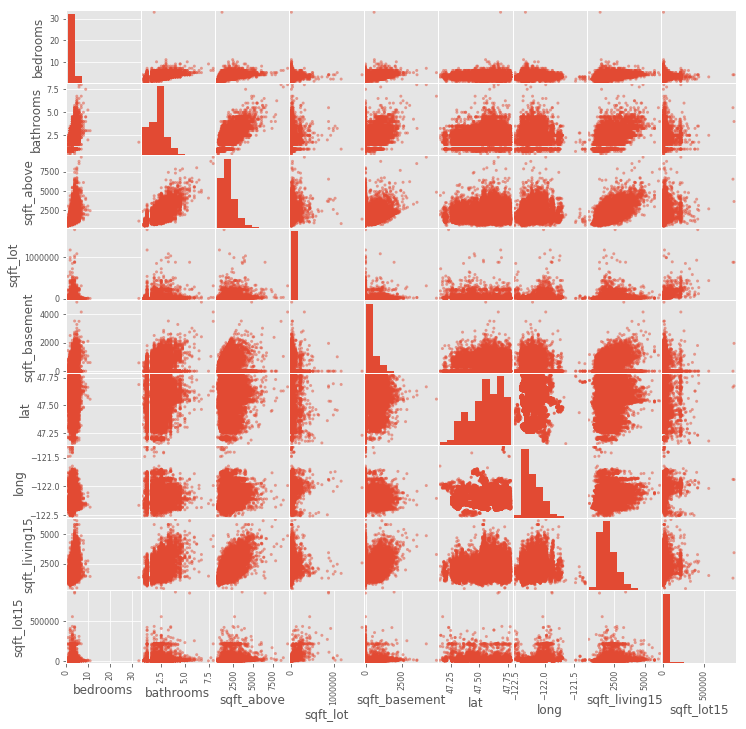

In [1068]:
# Let's visualize our distributions again, note that they are mostly skewed with long tails to the right
pd.plotting.scatter_matrix(kc[x_cols], figsize=(12,12));

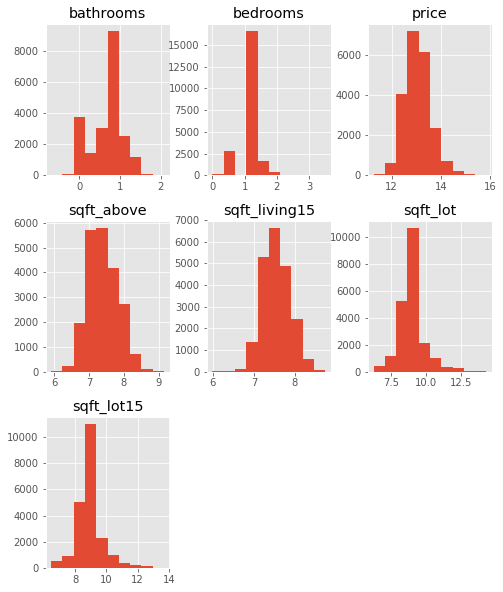

In [1319]:
# Let's look at log transformation on continuous variables
#Continuous data: bedrooms, bathrooms, price, sqft_lot, sqft_above, lat, long, sqft_living15, sqft_lot15
# We removed sqft_living since it is highly correlated with two other variables
data_log= pd.DataFrame([])
data_log["bedrooms"] = np.log(kc["bedrooms"])
data_log["bathrooms"] = np.log(kc["bathrooms"])
data_log["price"] = np.log(kc["price"])
data_log["sqft_above"] = np.log(kc["sqft_above"])
data_log["sqft_lot"] = np.log(kc["sqft_lot"])
data_log["sqft_living15"] = np.log(kc["sqft_living15"])
data_log["sqft_lot15"] = np.log(kc["sqft_lot15"])
# data_log["lat"] = np.log(kc['lat'])    # Attempted to log transform lat and long since they are continuous but 
# data_log["long"] = np.log(kc['long'])  # Can't transform long since it is negative and will result in NaNs
                                         # Thus did not transform lat and long variables

data_log.hist(figsize  = [8, 10]);

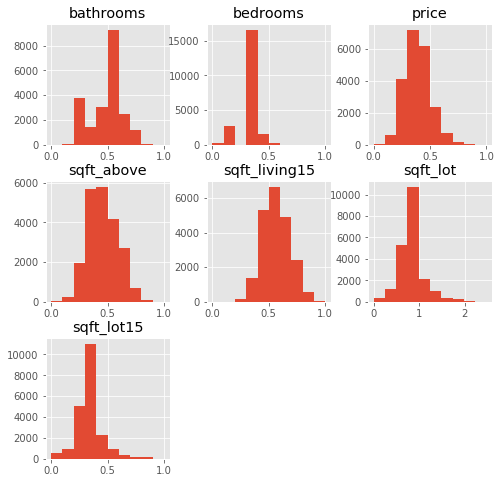

In [1320]:
#log transform all continuous variables we are keeping
logbedrooms = data_log["bedrooms"]
logbathrooms = data_log["bathrooms"]
logprice = data_log["price"]
logsqft_above = data_log["sqft_above"]
logsqft_lot = data_log["sqft_lot"]
logsqft_living15 = data_log["sqft_living15"]
logsqft_lot15 = data_log["sqft_lot15"]
#loglat = data_log["lat"]
#loglong = data_log["long"]


kc_features_final= pd.DataFrame([])

# Use min max scaling on all continuous variables

kc_features_final["bedrooms"] = (logbedrooms-min(logbedrooms))/(max(logbedrooms)-min(logbedrooms))
kc_features_final["bathrooms"] = (logbathrooms-min(logbathrooms))/(max(logbathrooms)-min(logbathrooms))
kc_features_final["price"] = (logprice-min(logprice))/(max(logprice)-min(logprice))
kc_features_final["sqft_above"] = (logsqft_above-min(logsqft_above))/(max(logsqft_above)-min(logsqft_above))
kc_features_final["sqft_lot"] = (logsqft_lot-min(logsqft_lot))/(max(logsqft_living)-min(logsqft_lot))
kc_features_final["sqft_living15"] = (logsqft_living15-min(logsqft_living15))/(max(logsqft_living15)-min(logsqft_living15))
kc_features_final["sqft_lot15"] = (logsqft_lot15-min(logsqft_lot15))/(max(logsqft_lot15)-min(logsqft_lot15))
#kc_features_final["lat"] = (loglat-min(loglat))/(max(loglat)-min(loglat))
#kc_features_final["long"] = (loglong-min(loglong))/(max(loglong)-min(loglong))

kc_features_final.hist(figsize  = [8, 8]);


In [1321]:
kc_features_final.head()

,bedrooms,bathrooms,price,sqft_above,sqft_lot,sqft_living15,sqft_lot15
0,0.314203,0.250000,0.227669,0.358392,0.731869,0.441342,0.300162
1,0.314203,0.542481,0.420522,0.546652,0.808027,0.525882,0.342058
2,0.198240,0.250000,0.182099,0.226478,0.907024,0.699256,0.349544
3,0.396480,0.646241,0.445720,0.322322,0.694374,0.446739,0.283185
4,0.314203,0.500000,0.408883,0.467563,0.841618,0.548854,0.339562


In [1322]:
kc_features_final.corr() 
# price is highly correlated with bathrooms, sqft_above, sqft_living15, but those variables are all highly correlated
# with each other. 

,bedrooms,bathrooms,price,sqft_above,sqft_lot,sqft_living15,sqft_lot15
bedrooms,1.000000,0.534854,0.343592,0.547577,0.196913,0.427561,0.176357
bathrooms,0.534854,1.000000,0.520451,0.683505,0.084878,0.569826,0.079136
price,0.343592,0.520451,1.000000,0.586173,0.138570,0.606839,0.124110
sqft_above,0.547577,0.683505,0.586173,1.000000,0.319232,0.713587,0.299404
sqft_lot,0.196913,0.084878,0.138570,0.319232,1.000000,0.364216,0.918609
sqft_living15,0.427561,0.569826,0.606839,0.713587,0.364216,1.000000,0.374068
sqft_lot15,0.176357,0.079136,0.124110,0.299404,0.918609,0.374068,1.000000


In [1323]:
# now add dummies to new dataframe
#- Categorical data: bedrooms, bathrooms, floors, waterfront, view, condition, yr_built, yr_renovated, grade, zipcode
lat = kc["lat"] # add lat and long since they were not transformed
long = kc["long"]
kc_features_final = pd.concat([kc_features_final, lat, long, waterfront_dummy, condition_dummy, grade_dummy,
                              view_dummy, floors_dummy, yr_built_dummy, yr_renovated_dummy], axis=1)


In [1324]:
kc_features_final.head() # preview of our cleaned up data

,bedrooms,bathrooms,price,sqft_above,sqft_lot,sqft_living15,sqft_lot15,lat,long,waterfront_1.0,...,"yr_built_(2000, 2010]","yr_built_(2010, 2020]","yr_renovated_(1940, 1950]","yr_renovated_(1950, 1960]","yr_renovated_(1960, 1970]","yr_renovated_(1970, 1980]","yr_renovated_(1980, 1990]","yr_renovated_(1990, 2000]","yr_renovated_(2000, 2010]","yr_renovated_(2010, 2020]"
0,0.314203,0.250000,0.227669,0.358392,0.731869,0.441342,0.300162,47.5112,-122.257,0,...,0,0,0,0,0,0,0,0,0,0
1,0.314203,0.542481,0.420522,0.546652,0.808027,0.525882,0.342058,47.7210,-122.319,0,...,0,0,0,0,0,0,0,1,0,0
2,0.198240,0.250000,0.182099,0.226478,0.907024,0.699256,0.349544,47.7379,-122.233,0,...,0,0,0,0,0,0,0,0,0,0
3,0.396480,0.646241,0.445720,0.322322,0.694374,0.446739,0.283185,47.5208,-122.393,0,...,0,0,0,0,0,0,0,0,0,0
4,0.314203,0.500000,0.408883,0.467563,0.841618,0.548854,0.339562,47.6168,-122.045,0,...,0,0,0,0,0,0,0,0,0,0


## Multiple Linear Regression Time

In [1325]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [1327]:
kc_features_final.columns # check what variables we have left

Index(['bedrooms', 'bathrooms', 'price', 'sqft_above', 'sqft_lot',
       'sqft_living15', 'sqft_lot15', 'lat', 'long', 'waterfront_1.0',
       'condition_2', 'condition_3', 'condition_4', 'condition_5', 'grade_4',
       'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10',
       'grade_11', 'grade_12', 'grade_13', 'view_1.0', 'view_2.0', 'view_3.0',
       'view_4.0', 'floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.0',
       'floors_3.5', 'yr_built_(1900, 1910]', 'yr_built_(1910, 1920]',
       'yr_built_(1920, 1930]', 'yr_built_(1930, 1940]',
       'yr_built_(1940, 1950]', 'yr_built_(1950, 1960]',
       'yr_built_(1960, 1970]', 'yr_built_(1970, 1980]',
       'yr_built_(1980, 1990]', 'yr_built_(1990, 2000]',
       'yr_built_(2000, 2010]', 'yr_built_(2010, 2020]',
       'yr_renovated_(1940, 1950]', 'yr_renovated_(1950, 1960]',
       'yr_renovated_(1960, 1970]', 'yr_renovated_(1970, 1980]',
       'yr_renovated_(1980, 1990]', 'yr_renovated_(1990, 2000]',
     

In [1328]:
kc_features_final = kc_features_final.drop(columns=['price']) # drop 'price' from features since this is the target

In [919]:
# assign our independent variables to X and our dependent variable to y
X = kc_features_final
#y = pd.Series(kc.price)#, columns= ["price"])
y = pd.DataFrame(kc.price, columns = ["price"])

In [920]:
X.head()
type(y)
y.head()

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


In [1329]:
# Run a Multiple Linear Regression Model with all independent variables 
import statsmodels.api as sm
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int.astype(float)).fit()
model.summary()

C:\Users\isali\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     1002.
Date:                Thu, 25 Jul 2019   Prob (F-statistic):               0.00
Time:                        01:13:15   Log-Likelihood:            -2.9153e+05
No. Observations:               21420   AIC:                         5.832e+05
Df Residuals:                   21366   BIC:                         5.836e+05
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -1.701e+07   7.21e+05    -23.578      0.000   -1.84e+07   -1.56e+07
bedrooms                   1.879e+04   2.26e+04      0.832      0.406   -2.55e+04    6.31e+04
bathrooms                  3.331e+05   1.65e+04     20.196      0.000    3.01e+05    3.65e+05
sqft_above                 4.665e+05   2.29e+04     20.407      0.000    4.22e+05    5.11e+05
sqft_lot                   4.326e+04   1.29e+04      3.342      0.001    1.79e+04    6.86e+04
sqft_living15              3.244e+05   1.89e+04     17.127      0.000    2.87e+05    3.61e+05
sqft_lot15                -1.662e+05    3.1e+04     -5.367      0.000   -2.27e+05   -1.06e+05
lat                        5.853e+05   1.06e+04     55.302      0.000    5.65e+05    6.06e+05
long                       -9.04e+04   1.24e+04     -7.314      0.000   -1.15e+05   -6.62e+04
waterfront_0.0            -8.793e+06   3.61e+05    -24.386      0.000    -9.5e+06   -8.09e+06
waterfront_1.0            -8.215e+06   3.61e+05    -22.752      0.000   -8.92e+06   -7.51e+06
condition_1                 -3.5e+06   1.48e+05    -23.631      0.000   -3.79e+06   -3.21e+06
condition_2               -3.417e+06   1.45e+05    -23.575      0.000    -3.7e+06   -3.13e+06
condition_3               -3.411e+06   1.44e+05    -23.608      0.000   -3.69e+06   -3.13e+06
condition_4                -3.36e+06   1.44e+05    -23.290      0.000   -3.64e+06   -3.08e+06
condition_5                -3.32e+06   1.44e+05    -23.025      0.000    -3.6e+06   -3.04e+06
grade_3                   -1.891e+06   1.91e+05     -9.928      0.000   -2.26e+06   -1.52e+06
grade_4                   -2.074e+06   7.47e+04    -27.758      0.000   -2.22e+06   -1.93e+06
grade_5                   -2.126e+06   6.77e+04    -31.389      0.000   -2.26e+06   -1.99e+06
grade_6                   -2.104e+06   6.77e+04    -31.081      0.000   -2.24e+06   -1.97e+06
grade_7                   -2.058e+06   6.82e+04    -30.192      0.000   -2.19e+06   -1.92e+06
grade_8                   -1.989e+06   6.86e+04    -28.993      0.000   -2.12e+06   -1.85e+06
grade_9                   -1.841e+06    6.9e+04    -26.671      0.000   -1.98e+06   -1.71e+06
grade_10                  -1.619e+06   6.96e+04    -23.274      0.000   -1.76e+06   -1.48e+06
grade_11                  -1.289e+06   7.04e+04    -18.307      0.000   -1.43e+06   -1.15e+06
grade_12                  -6.975e+05   7.28e+04     -9.583      0.000    -8.4e+05   -5.55e+05
grade_13                   6.806e+05   8.71e+04      7.812      0.000     5.1e+05    8.51e+05
view_0.0                  -3.535e+06   1.44e+05    -24.548      0.000   -3.82e+06   -3.25e+06
view_1.0                    -3.4e+06   1.45e+05    -23.466      0.000   -3.68e+06   -3.12e+06
view_2.0                  -3.451e+06   1.44e+05    -23.919      0.000   -3.

In [ ]:
# R-Squared is .713 which is quite high. Adj R-squared is similar so there may be some multicollinearity
# Prob (F-Statistic) is 0.00 which is significant
# most variables and a significant effect on price except for bedrooms, yr_renovated_(0, 1940], 
# yr_renovated_(1940, 1950], yr_renovated_(1970, 1980], yr_renovated_(1980, 1990]

## Stepwise Selection

In [1330]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
         # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [1331]:
# Define our predictor and target variables
result = stepwise_selection(X=X, y=y, verbose = True)
print('resulting features:')
print(result)

Add  view_0.0                       with p-value 0.0
Add  lat                            with p-value 0.0
Add  floors_1.0                     with p-value 0.0
Add  sqft_above                     with p-value 0.0
Add  grade_12                       with p-value 0.0
Add  grade_11                       with p-value 0.0
Add  grade_10                       with p-value 0.0
Add  grade_13                       with p-value 0.0
Add  waterfront_0.0                 with p-value 1.54944e-289
Add  waterfront_1.0                 with p-value 0.0
Add  grade_9                        with p-value 8.59192e-236
Add  condition_3                    with p-value 9.15065e-134
Drop floors_1.0                     with p-value 0.0775234


C:\Users\isali\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


Add  bathrooms                      with p-value 1.51687e-108
Add  long                           with p-value 1.03081e-98
Add  sqft_living15                  with p-value 7.12622e-95
Add  yr_renovated_(2000, 2010]      with p-value 3.1564e-76
Add  yr_built_(1900, 1910]          with p-value 3.68923e-46
Add  yr_built_(1920, 1930]          with p-value 6.63091e-52
Add  grade_8                        with p-value 1.13858e-44
Add  yr_built_(1910, 1920]          with p-value 5.10304e-47
Add  floors_2.0                     with p-value 3.07251e-35
Add  view_4.0                       with p-value 1.03863e-30
Add  yr_built_(1980, 1990]          with p-value 1.75108e-26
Add  yr_built_(1990, 2000]          with p-value 1.85194e-36
Add  yr_built_(1970, 1980]          with p-value 1.13254e-20
Add  yr_built_(2000, 2010]          with p-value 1.15019e-32
Add  condition_5                    with p-value 1.3519e-15
Add  yr_built_(1960, 1970]          with p-value 3.18972e-14
Add  grade_7             

In [1332]:
import statsmodels.api as sm
X_fin = X[['view_0.0', 'lat', 'sqft_above', 'grade_12', 'grade_11', 'grade_10', 'grade_13', 'waterfront_0.0', 
           'waterfront_1.0', 'grade_9', 'bathrooms', 'long', 'sqft_living15', 'yr_renovated_(2000, 2010]', 
           'yr_built_(1900, 1910]', 'yr_built_(1920, 1930]', 'grade_8', 'yr_built_(1910, 1920]', 'view_4.0', 
           'yr_built_(1980, 1990]', 'yr_built_(1990, 2000]', 'yr_built_(1970, 1980]', 'yr_built_(2000, 2010]', 
           'condition_5', 'yr_built_(1960, 1970]', 'grade_7', 'yr_built_(2010, 2020]', 'yr_built_(1950, 1960]', 
           'view_2.0', 'floors_2.5', 'yr_renovated_(1990, 2000]', 'yr_renovated_(2010, 2020]', 'floors_1.0', 
           'sqft_lot15', 'yr_built_(1940, 1950]', 'condition_4', 'sqft_lot', 'yr_renovated_(1960, 1970]']]
X_with_intercept = sm.add_constant(X_fin)
model = sm.OLS(y,X_with_intercept).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     1434.
Date:                Thu, 25 Jul 2019   Prob (F-statistic):               0.00
Time:                        01:24:51   Log-Likelihood:            -2.9154e+05
No. Observations:               21420   AIC:                         5.832e+05
Df Residuals:                   21382   BIC:                         5.835e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -2.575e+07   1.06e+06    -24.317      0.000   -2.78e+07   -2.37e+07
view_0.0                  -1.501e+05   7283.380    -20.612      0.000   -1.64e+05   -1.36e+05
lat                         5.85e+05   1.05e+04     55.806      0.000    5.64e+05    6.06e+05
sqft_above                 4.715e+05   2.18e+04     21.670      0.000    4.29e+05    5.14e+05
grade_12                   1.411e+06   2.35e+04     60.123      0.000    1.37e+06    1.46e+06
grade_11                    8.18e+05   1.35e+04     60.383      0.000    7.91e+05    8.45e+05
grade_10                   4.881e+05   9990.272     48.854      0.000    4.68e+05    5.08e+05
grade_13                   2.788e+06   5.61e+04     49.666      0.000    2.68e+06     2.9e+06
waterfront_0.0            -1.316e+07   5.29e+05    -24.869      0.000   -1.42e+07   -1.21e+07
waterfront_1.0            -1.258e+07    5.3e+05    -23.758      0.000   -1.36e+07   -1.15e+07
grade_9                    2.654e+05   8159.155     32.522      0.000    2.49e+05    2.81e+05
bathrooms                  3.377e+05   1.55e+04     21.797      0.000    3.07e+05    3.68e+05
long                      -9.118e+04   1.22e+04     -7.453      0.000   -1.15e+05   -6.72e+04
sqft_living15              3.227e+05   1.88e+04     17.212      0.000    2.86e+05    3.59e+05
yr_renovated_(2000, 2010]  1.982e+05   1.39e+04     14.277      0.000    1.71e+05    2.25e+05
yr_built_(1900, 1910]      4.581e+04   1.08e+04      4.234      0.000    2.46e+04     6.7e+04
yr_built_(1920, 1930]      2.503e+04   9620.472      2.601      0.009    6169.474    4.39e+04
grade_8                    1.182e+05   6564.023     18.010      0.000    1.05e+05    1.31e+05
yr_built_(1910, 1920]      2.715e+04   1.05e+04      2.588      0.010    6588.587    4.77e+04
view_4.0                   1.365e+05   1.51e+04      9.024      0.000    1.07e+05    1.66e+05
yr_built_(1980, 1990]     -1.726e+05   9269.294    -18.618      0.000   -1.91e+05   -1.54e+05
yr_built_(1990, 2000]      -1.83e+05   9685.177    -18.893      0.000   -2.02e+05   -1.64e+05
yr_built_(1970, 1980]     -1.412e+05   9122.641    -15.479      0.000   -1.59e+05   -1.23e+05
yr_built_(2000, 2010]     -1.448e+05   9496.310    -15.246      0.000   -1.63e+05   -1.26e+05
condition_5                9.252e+04   5513.775     16.781      0.000    8.17e+04    1.03e+05
yr_built_(1960, 1970]     -1.089e+05   8977.256    -12.132      0.000   -1.27e+05   -9.13e+04
grade_7                    4.881e+04   5356.531      9.112      0.000    3.83e+04    5.93e+04
yr_built_(2010, 2020]     -1.089e+05   1.08e+04    -10.043      0.000    -1.3e+05   -8.77e+04
yr_built_(1950, 1960]     -7.858e+04   8859.040     -8.870      0.000   -9.59e+04   -6.12e+04
view_2.0                  -6.592e+04   9375.837     -7.031      0.000   -8.

1) Dependent Variable (DV): No Transformation

   Independent Variable (IV): No Transformation
   
   The model predicts that a 1 unit increase in IV leads to an increase/decrease in DV by <beta> units
    
    
2) DV: log transform  IV: log transform

   the model predicts that a 1% increase in X leads to an increase/decrease in DV by <beta>%
    
3) DV: log transform  IV: no transformation

   The model predicts that a 1 unit increase in IV leads to an increase/decrease in DV by 100*<beta>

4) DV: no transformation   IV: log transformation

   The model predicts that a 1% increase in IV leads to an increase/decrease in DV by <beta>/100 units
    

It is difficult to try and interpret log transformed data as a specific value. It is better to interpret this data generally, such as if the relationship is positive or negative.

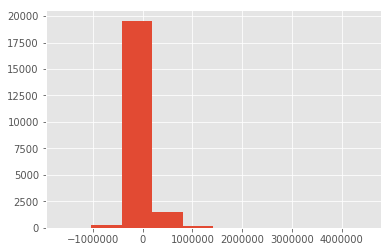

In [1333]:
plt.hist(model.resid)
plt.show()

## Feature ranking with recursive feature elimination

In [1334]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 5)
selector = selector.fit(X, y)

C:\Users\isali\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1335]:
selector.support_

array([False, False,  True, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [1336]:
selector.ranking_

array([53, 10,  1, 52, 37, 48,  1, 45,  1,  3, 23, 32, 33, 27, 26, 11,  7,
        5,  4,  6,  8,  9, 28,  2,  1,  1, 40, 44, 42, 43, 38, 34, 29, 30,
       16, 31, 19, 13, 12, 15, 14, 25, 35, 36, 24, 22, 18, 17, 20, 21, 50,
       51, 49, 41, 54, 55, 46, 39, 47])

In [1337]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[ 1374688.87213333   830612.48974603 -1001053.89522145  1109287.00365862
  2575204.5053405 ]
-38605266.05063517


In [1338]:
selected_columns = X.columns[selector.support_ ]
linreg.fit(X[selected_columns],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [1339]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [1340]:
yhat = linreg.predict(X[selected_columns])

In [1341]:
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X[selected_columns].shape[1]-1)

In [1342]:
r_squared

price    0.515496
dtype: float64

In [1343]:
adjusted_r_squared

price    0.515383
dtype: float64

The r_squared and adjusted r_squared are very similar, so the model is a good fit.

## Test/Train Data


In [1344]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # split to 20% test and 80% train

In [1345]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

17136 4284 17136 4284


In [1346]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [1347]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [1348]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squared Error:', mse_train)
print('Test Mean Squared Error:', mse_test)

Train Mean Squared Error: price    3.825151e+10
dtype: float64
Test Mean Squared Error: price    1.344077e+30
dtype: float64


In [1349]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 38251509253.47771
Test Mean Squared Error: 1.3440770690762024e+30


In [1350]:
print('Mean Predicted Selling Price:', y_hat_test.mean())
print('Mean Selling Price:', y_test.mean())


Mean Predicted Selling Price: -17712804996613.84
Mean Selling Price: price    548383.056022
dtype: float64


In [ ]:
# Our train and test mean squared errors are vastly different, thus not a good predictive model. Will try again 
# with a higher number of features.

## Second Try RFE 

In [1453]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 18) # Through trial and error - 18 for more features and less mean sq error
selector = selector.fit(X, y)

C:\Users\isali\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1454]:
selector.support_

array([False,  True,  True, False, False, False,  True, False,  True,
        True, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [1455]:
selector.ranking_

array([40,  1,  1, 39, 24, 35,  1, 32,  1,  1, 10, 19, 20, 14, 13,  1,  1,
        1,  1,  1,  1,  1, 15,  1,  1,  1, 27, 31, 29, 30, 25, 21, 16, 17,
        3, 18,  6,  1,  1,  2,  1, 12, 22, 23, 11,  9,  5,  4,  7,  8, 37,
       38, 36, 28, 41, 42, 33, 26, 34])

In [1456]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[ 277991.03885963  392380.10368417  655424.18042704 -439771.12562582
  439771.12562582 -180911.72087447 -479158.79371244 -542964.15708888
 -517256.26987403 -485807.19511559 -409448.45471566 -240256.98534776
  360742.30451546  981140.82956077 2481766.19301013  152234.25885958
  177374.04495122  149197.87005573]
-30140632.30196056


In [1457]:
selected_columns = X.columns[selector.support_ ]
linreg.fit(X[selected_columns],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [1458]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [1459]:
yhat = linreg.predict(X[selected_columns])

In [1460]:
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X[selected_columns].shape[1]-1)

In [1461]:
r_squared

price    0.647641
dtype: float64

In [1462]:
adjusted_r_squared

price    0.647345
dtype: float64

## Second Try Train/Test data

In [1463]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # split to 20% test and 80% train

In [1464]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

17136 4284 17136 4284


In [1465]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [1466]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [1467]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squared Error:', mse_train)
print('Test Mean Squared Error:', mse_test)

Train Mean Squared Error: price    3.915446e+10
dtype: float64
Test Mean Squared Error: price    3.790142e+10
dtype: float64


In [1468]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 39154456164.63311
Test Mean Squared Error: 37901418389.49463


In [1469]:
print('Mean Predicted Selling Price:', y_hat_test.mean())
print('Mean Selling Price:', y_test.mean())

Mean Predicted Selling Price: 538329.964519141
Mean Selling Price: price    535399.215453
dtype: float64


In [ ]:
# The difference between the errors using 15 features is much smaller than with only 5 features

## Let's Try another model and Compare

In [ ]:
X_fin2 = X[['view_0.0', 'lat', 'sqft_above', 'grade_12', 'grade_11', 'grade_10', 'grade_13', 'waterfront_0.0', 
           'waterfront_1.0', 'grade_9', 'bathrooms', 'long', 'sqft_living15', 'yr_renovated_(2000, 2010]', 
           'yr_built_(1900, 1910]', 'yr_built_(1920, 1930]', 'grade_8', 'yr_built_(1910, 1920]', 'view_4.0', 
           'yr_built_(1980, 1990]', 'yr_built_(1990, 2000]', 'yr_built_(1970, 1980]', 'yr_built_(2000, 2010]', 
           'condition_5', 'yr_built_(1960, 1970]', 'grade_7', 'yr_built_(2010, 2020]', 'yr_built_(1950, 1960]', 
           'view_2.0', 'floors_2.5', 'yr_renovated_(1990, 2000]', 'yr_renovated_(2010, 2020]', 'floors_1.0', 
           'sqft_lot15', 'yr_built_(1940, 1950]', 'condition_4', 'sqft_lot', 'yr_renovated_(1960, 1970]']]
X_with_intercept = sm.add_constant(X_fin2)
model = sm.OLS(y,X_with_intercept).fit()
model.summary()

## Cross Validation

In [1470]:
def kfolds(data, k):
    #Force data as pandas dataframe
    data = pd.DataFrame(data)
    num_observations = len(data)
    fold_size = num_observations//k
    leftovers = num_observations%k
    folds = []
    start_obs = 0
    for fold_n in range(1,k+1):
        if fold_n <= leftovers:
            #Fold Size will be 1 larger to account for leftovers
            fold =  data.iloc[start_obs : start_obs+fold_size+1] 
            folds.append(fold)
            start_obs +=  fold_size + 1
        else:
            fold =  data.iloc[start_obs : start_obs+fold_size] 
            folds.append(fold)
            start_obs +=  fold_size
            
    return folds 

In [1471]:
kc_data = pd.concat([X.reset_index(drop=True), y], axis=1)

In [1472]:
kc_folds = kfolds(kc_data, 5)

In [1473]:
test_errs = []
train_errs = []
k=5

for n in range(k):
    # Split in train and test for the fold
    train = pd.concat([fold for i, fold in enumerate(kc_folds) if i!=n])
    test = kc_folds[n]
    # Fit a linear regression model
    linreg.fit(train[X.columns], train[y.columns])
    #Evaluate Train and Test Errors
    y_hat_train = linreg.predict(train[X.columns])
    y_hat_test = linreg.predict(test[X.columns])
    train_residuals = y_hat_train - train[y.columns]
    test_residuals = y_hat_test - test[y.columns]
    train_errs.append(np.mean(train_residuals.astype(float)**2))
    test_errs.append(np.mean(test_residuals.astype(float)**2))
print(train_errs)
print(test_errs)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [725]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error")

In [726]:
cv_5_results

array([-8.35002578e+28, -4.14973859e+10, -3.47800023e+10, -3.86960653e+10,
       -4.23573901e+10])

AttributeError: 'DataFrame' object has no attribute 'grade'

## The End!